In [1]:
import pickle as pkl
import numpy as np
import pandas as pd
import random
import requests as rq
import json
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.cm as cm
from empath import Empath
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import pyLDAvis
import pyLDAvis.gensim
import operator
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

In [2]:
Allgraphs_SW = "../Data/reddit_suicideWatch/SW_morethan10_graphs_complete_revised/SW_morethan10_deeper_replygraphs_v3.pkl"
# Allgraphs_SW = "../Data/reddit_suicideWatch/SW_allValidThreads_graphs/SW_Allvalid_Graphs.pkl"
Allgraphs_BL2 = "../Data/reddit_TheDonald/theDonald_graph/TheDonald_replygraphs.pkl"
Allgraphs_BL = "../Data/reddit_askScience/reddit_askScience_Graphs/AskScience_replygraphs.pkl"

In [3]:
allGraphs_SW = pkl.load(open(Allgraphs_SW,'rb'))
allGraphs_BL = pkl.load(open(Allgraphs_BL,'rb'))
allGraphs_BL2 = pkl.load(open(Allgraphs_BL2,'rb'))

In [4]:
textDict = {}
for k in allGraphs_SW:
    postText = nx.get_node_attributes(allGraphs_SW[k],'text')
    textDict.update(postText)

In [5]:
len(allGraphs_SW)

10157

In [6]:
len(textDict)

216992

In [7]:
def readModeratorFile(f):
    modIds = []
    modMeta = []
    js = json.load(open(f,'rb'))
    data = js['data']['children']
    for k in data:
        modIds.append(k['name'])
        modMeta.append(k)
    return modIds, modMeta

In [8]:
SW_mods, SW_modMeta = readModeratorFile("../Data/reddit_suicideWatch/moderators.json")

In [9]:
print SW_mods, len(SW_mods)

[u'S2S2S2S2S2', u'qgyh2', u'Psy-Kosh', u'SicSemperHumanus', u'SQLwitch', u'UnDire', u'pkbooo', u'skyqween', u'MykeeB', u'circinia', u'svabhava-sunya', u'sofar1776'] 12


In [10]:
SW_modMeta[1]

{u'author_flair_css_class': None,
 u'author_flair_text': None,
 u'date': 1230644033.0,
 u'id': u't2_1uzpp',
 u'mod_permissions': [u'all'],
 u'name': u'qgyh2'}

In [11]:
import datetime
times = [datetime.datetime.fromtimestamp(int(k['date'])).strftime('%Y-%m-%d %H:%M:%S')  for k in SW_modMeta  ]

In [12]:
print times

['2008-12-16 13:46:24', '2008-12-30 13:33:53', '2010-01-10 17:51:57', '2010-09-09 08:16:49', '2010-09-16 04:17:50', '2011-12-11 21:53:18', '2012-02-08 01:47:35', '2012-09-16 21:45:42', '2013-11-17 13:10:44', '2014-06-05 02:57:29', '2014-07-08 12:15:35', '2017-11-12 00:53:36']


In [13]:
AS_mods = readModeratorFile("../Data/reddit_TheDonald/moderators.json")

In [14]:
print AS_mods , len(AS_mods)

([u'shadowman3001', u'Grakmarr', u'US2A', u'sublimeinslime', u'Trumpshaker', u'zettapede', u'thunderbert80', u'Ivaginaryfriend', u'Foss_is_Boss', u'mivvan', u'Katfish29', u'IanPatrick1966', u'lalicat', u'Trumpropriation', u'Knollsit', u'richmomz', u'SportzStar', u'lolmonger', u'MorePancakes', u'D4rkd3str0yer', u'Sanotsuto', u'bh506407', u'pm_me_yo_doggos', u'CovfefeBucks', u'eGOTheJudge', u'DrWeeGee', u'Keln78', u'DanWofSoc', u'BotForceOne', u'AutoModerator', u'Medically', u'Velostodon'], [{u'author_flair_css_class': u'tomahawkmissile', u'author_flair_text': u'MHM', u'mod_permissions': [u'all'], u'date': 1495507695.0, u'id': u't2_5y6sb', u'name': u'shadowman3001'}, {u'author_flair_css_class': u'treadonme', u'author_flair_text': u'1776', u'mod_permissions': [u'all'], u'date': 1508277635.0, u'id': u't2_a9f6l', u'name': u'Grakmarr'}, {u'author_flair_css_class': u'captain', u'author_flair_text': u'MAGA', u'mod_permissions': [u'all'], u'date': 1508277639.0, u'id': u't2_uuiui', u'name': u'US

In [15]:
# import csv
# fieldnames = ['postid', 'text']
# with open('../Data/reddit_suicideWatch/SW_Alltext.csv', 'wb') as output_file:
#     dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
#     dict_writer.writeheader()
#     for k in textDict:
#         dict_writer.writerow({'postid': k , 'text': textDict[k]})


In [16]:
LIWC_BL2 = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_TheDonald/LIWC2015_TheDonaldTop.csv")
LIWC_BL = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_askScience/LIWC2015_AskScienceTop.csv")
# LIWC_SW = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC2015_SWTextComplete.csv")
LIWC_SW = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC2015_SW_Alltext.csv")

In [17]:
LIWC_SW.keys()

Index([u'A', u'B', u'WC', u'Analytic', u'Clout', u'Authentic', u'Tone', u'WPS',
       u'Sixltr', u'Dic', u'function', u'pronoun', u'ppron', u'i', u'we',
       u'you', u'shehe', u'they', u'ipron', u'article', u'prep', u'auxverb',
       u'adverb', u'conj', u'negate', u'verb', u'adj', u'compare', u'interrog',
       u'number', u'quant', u'affect', u'posemo', u'negemo', u'anx', u'anger',
       u'sad', u'social', u'family', u'friend', u'female', u'male', u'cogproc',
       u'insight', u'cause', u'discrep', u'tentat', u'certain', u'differ',
       u'percept', u'see', u'hear', u'feel', u'bio', u'body', u'health',
       u'sexual', u'ingest', u'drives', u'affiliation', u'achieve', u'power',
       u'reward', u'risk', u'focuspast', u'focuspresent', u'focusfuture',
       u'relativ', u'motion', u'space', u'time', u'work', u'leisure', u'home',
       u'money', u'relig', u'death', u'informal', u'swear', u'netspeak',
       u'assent', u'nonflu', u'filler', u'AllPunc', u'Period', u'Comma',
     

In [18]:
print len(LIWC_SW) , len(LIWC_BL2) , len(LIWC_BL)

419575 447177 22046


In [19]:
LIWC_SW.drop(LIWC_SW.index[0])
LIWC_BL.drop(LIWC_BL.index[0])
LIWC_BL2.drop(LIWC_BL2.index[0])

,A,B,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
1,t1_ddfth9o,A lifetime of believing left propaganda rots t...,9,99.00,50.00,98.01,25.77,9.00,33.33,77.78,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,t1_dan3bh2,[removed],1,92.84,50.00,99.00,25.77,1.00,100.00,100.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00
3,t1_dce37jy,/u/IAmTuckerCarlson how can we actually be hea...,79,43.51,95.01,36.87,25.77,26.33,20.25,91.14,...,1.27,1.27,0.00,1.27,1.27,2.53,2.53,0.00,0.00,8.86
4,t1_dbdivvv,"Careful, if enough people start believing in t...",19,76.19,29.92,96.09,1.00,19.00,26.32,84.21,...,5.26,0.00,0.00,0.00,5.26,0.00,0.00,0.00,0.00,0.00
5,t1_d9bo376,And then what? What's the Cure? Medicine? Ma...,22,31.44,18.16,31.94,25.77,5.50,13.64,72.73,...,0.00,0.00,0.00,22.73,0.00,0.00,0.00,4.55,0.00,13.64
6,t1_dan3bh8,You dont need bots when you can willy nilly ch...,13,3.37,98.93,1.40,25.77,13.00,0.00,61.54,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.69
7,t1_de2nfzx,"That *is* ""rape rape"". What do you call non-c...",21,10.46,31.71,37.24,1.00,7.00,9.52,80.95,...,0.00,0.00,0.00,4.76,0.00,4.76,9.52,0.00,0.00,9.52
8,t1_d8c0umx,She really is a murderer. No one will care abo...,21,10.46,50.00,1.00,1.00,10.50,14.29,80.95,...,0.00,0.00,0.00,0.00,23.81,0.00,0.00,9.52,0.00,0.00
9,t1_djteoko,Muslims would HATE being compared to Hinduism,7,67.14,50.00,1.00,1.00,7.00,42.86,100.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10,t1_di2zdlx,Fucking ShariaBlue in force today! Must have s...,14,97.54,1.67,1.06,1.00,7.00,14.29,78.57,...,7.14,0.00,0.00,0.00,14.29,0.00,0.00,0.00,0.00,0.00


In [20]:
def createAffectDict(LIWC):
    affectDict = {}
    for index , row in LIWC.iterrows():
        #affectDict[row['A']] =row['posemo'] - row['negemo']
        affectDict[row['A']] =row['Tone']
    return affectDict

def updateAffects(graphs , affectDict):
    for g in graphs:
        updateDict = {}
        for n in graphs[g].nodes():
            if n not in affectDict:
                continue
            updateDict[n] = affectDict[n]
        nx.set_node_attributes(graphs[g] , 'affects' , updateDict)

def getScaledSizes(graph):
    affects = nx.get_node_attributes(graph, 'affects')
    s = [int(affects[v]) for v in graph.nodes()]
    normed = [i + 10 for i in s]
    scaled = [v*(2^(v-np.min(normed)))+100 for v in normed]
    return scaled

def createUserGraphs(allGraphs,deletedUsers=None):
    userGraphs = {}
    for i in allGraphs:
        deleted = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        for e in allGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=1 )
            else:
                userGraph[src][dst]['weight'] += 1
        userGraphs[i] = userGraph
    return userGraphs

def drawReplyGraph(graph):
    cascadeGraph = graph
    sizes = getScaledSizes(cascadeGraph)
    pos = graphviz_layout(cascadeGraph, prog='neato')

    usr = list(set(nx.get_node_attributes(cascadeGraph, 'author').values()))
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in cascadeGraph:
        c = usr.index(cascadeGraph.node[node]['author'])
        colorMap.append(color[c])
        lls[node] = cascadeGraph.node[node]['author']
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    nx.draw(cascadeGraph,pos=pos ,node_size=sizes ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

def drawUserGraph(graph):
    ugraph = graph
    pos = graphviz_layout(ugraph, prog='neato')

    usr = ugraph.nodes()
    print len(usr)
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in ugraph:
        c = usr.index(node)
        colorMap.append(color[c])
        lls[node] = node
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    #
    nx.draw(ugraph,pos=pos ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

In [21]:
affectDict_SW = createAffectDict(LIWC_SW)
affectDict_BL = createAffectDict(LIWC_BL)

In [22]:
updateAffects(allGraphs_SW,affectDict_SW)

In [23]:
updateAffects(allGraphs_BL,affectDict_BL)

In [24]:
print len(allGraphs_SW) , len(allGraphs_BL)

10157 1001


In [25]:
allGraphs_SW[allGraphs_SW.keys()[2]].nodes(data=True)

[(u't3_fjatc',
  {'affects': 62.14,
   'author': u'dead_by_saturday',
   'depth': -1,
   'downs': 0,
   'text': 'After rebuilding my life for the 3th time, and before I have to do it for turn number 4 I\'m done.  I can\'t do it again, I refuse to do it again knowing nothing I\'ve done in the past ten years has been good enough to last more than a short time.  Married my first wife when I was 23 we had two great kids together but I screwed that up, I pushed her away and when she went I gave up too.   Met major SO number 2 after the first wife and pushed her away too, I tried to do things differently but in the end it all comes out the same.  At least she helped me get my kids so that I could make sure they were safe.  She promised when she pushed me to fight that she would always be there to help me but within 6 months of the kids coming to live with me she was gone.  Tried again a couple of times between her and wife #2 but all with the same results, I was alone.  Then I met wife numbe

In [26]:
allGraphs_BL[allGraphs_BL.keys()[2]].nodes(data=True)

[(u't1_dqwm6nt',
  {'affects': 54.07,
   'author': u'BluScr33n',
   'depth': -1,
   'downs': 0,
   'text': 'The Mars Global Surveyor was a probe sent to Mars with the purpose of detecting its magnetic field. It had a magnetometer on board that mapped the entire magnetic field of Mars from orbit.  Another way is by observing the effects of the magnetic anomalies on particles. Basically magnetic fields will deflect charged particles. If there is a small region on Mars with a stronger magnetic field the particles will be deflected more strongly there. This was seen by the electron spectrometer on Mars Express. Some sources:  https://www.jpl.nasa.gov/news/news.php?feature=5256  https://mgs-mager.gsfc.nasa.gov/  http://sci.esa.int/science-e/www/object/doc.cfm?fobjectid=36750  http://sci.esa.int/mars-express/58554-mars-ionosphere-shaped-by-crustal-magnetic-fields/',
   'time': 1512663077.0,
   'ups': 7}),
 (u't1_dqzt32d',
  {'affects': 99.0,
   'author': u'NuclearJezuz',
   'depth': 0,
   'd

In [27]:
def getAuthors(graphs):
    authors = {}
    for k in graphs:
        g = graphs[k]
        auth = nx.get_node_attributes(g,'author')
        for a in auth:
            if auth[a] in authors:
                authors[auth[a]]+=1
            else:
                authors[auth[a]]=1
    return authors

In [28]:
authCount_SW = getAuthors(allGraphs_SW)
authCount_BL = getAuthors(allGraphs_BL)

In [29]:
print max(authCount_SW.values()), max(authCount_BL.values())

37691 2353


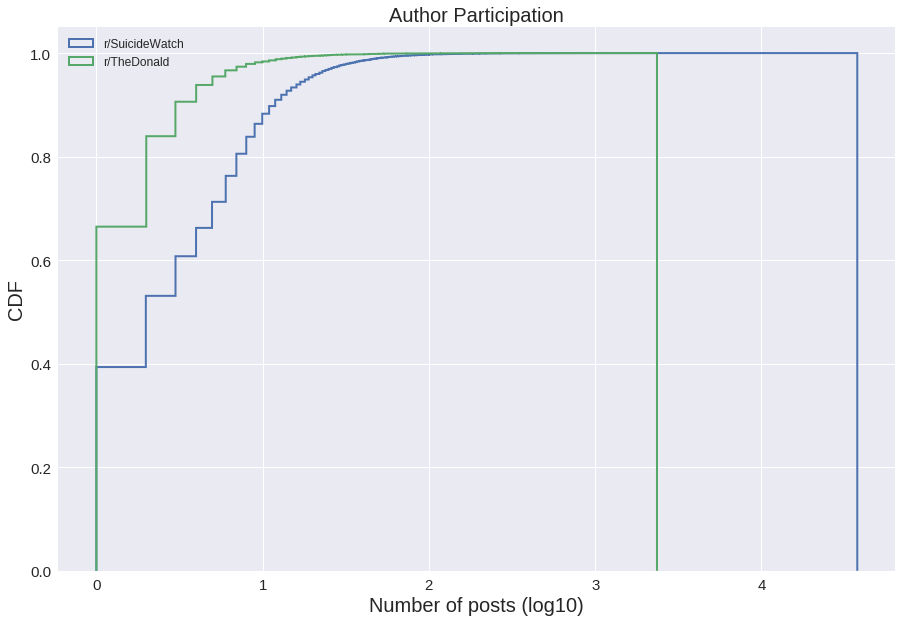

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(authCount_SW.values()), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(authCount_BL.values()), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Author Participation", fontsize = 20)
plt.xlabel("Number of posts (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch' , 'r/TheDonald'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [31]:
sortedAuths_SW = sorted(authCount_SW.items(), key=operator.itemgetter(1))

top1percent_SW = sortedAuths_SW[-(int(0.01*len(sortedAuths_SW))):-1]

top1percent_SW_auths = [k[0] for k in top1percent_SW]

print len(top1percent_SW_auths) , len(SW_mods)
print float(len(list(set(top1percent_SW_auths).intersection(set(SW_mods)))))/float(len(top1percent_SW))

309 12
0.0323624595469


In [32]:
sortedAuths_BL = sorted(authCount_BL.items(), key=operator.itemgetter(1))

top1percent_BL = sortedAuths_BL[-(int(0.01*len(sortedAuths_BL))):-1]

top1percent_BL_auths = [k[0] for k in top1percent_BL]

print len(top1percent_BL_auths) , len(AS_mods)
# print float(len(list(set(top1percent_BL_auths).intersection(set(AS_mods)))))/float(len(top1percent_BL))

95 2


In [33]:
allGraphs_BL[allGraphs_BL.keys()[19]].nodes(data=True)

[(u't1_dq2xr5z',
  {'affects': 97.58,
   'author': u'RobusEtCeleritas',
   'depth': 1,
   'downs': 0,
   'text': "I've had around six years of quantum-heavy courses between undergrad and graduate school.There are lots of good books out there on QFT. I like the one by Mandl and Shaw for a first course in QFT.",
   'time': 1511159887.0,
   'ups': 1}),
 (u't3_7e6byk',
  {'affects': 25.77,
   'author': u'FerrousBuchner',
   'depth': -1,
   'downs': 0,
   'text': 'I just saw a question like "what is the probability that an electron from the other side of the Earth is in my room. This made me wonder. AFAIK, an electron\'s probability distribution in space extends infinitely, but with an exponential decrease the further out you go. Does this not mean that an electron prepared in some localized state has a non-zero probability of traveling faster than the speed of light?The only way around this is if the probability distribution in space went to zero at some finite distance away, that is relat

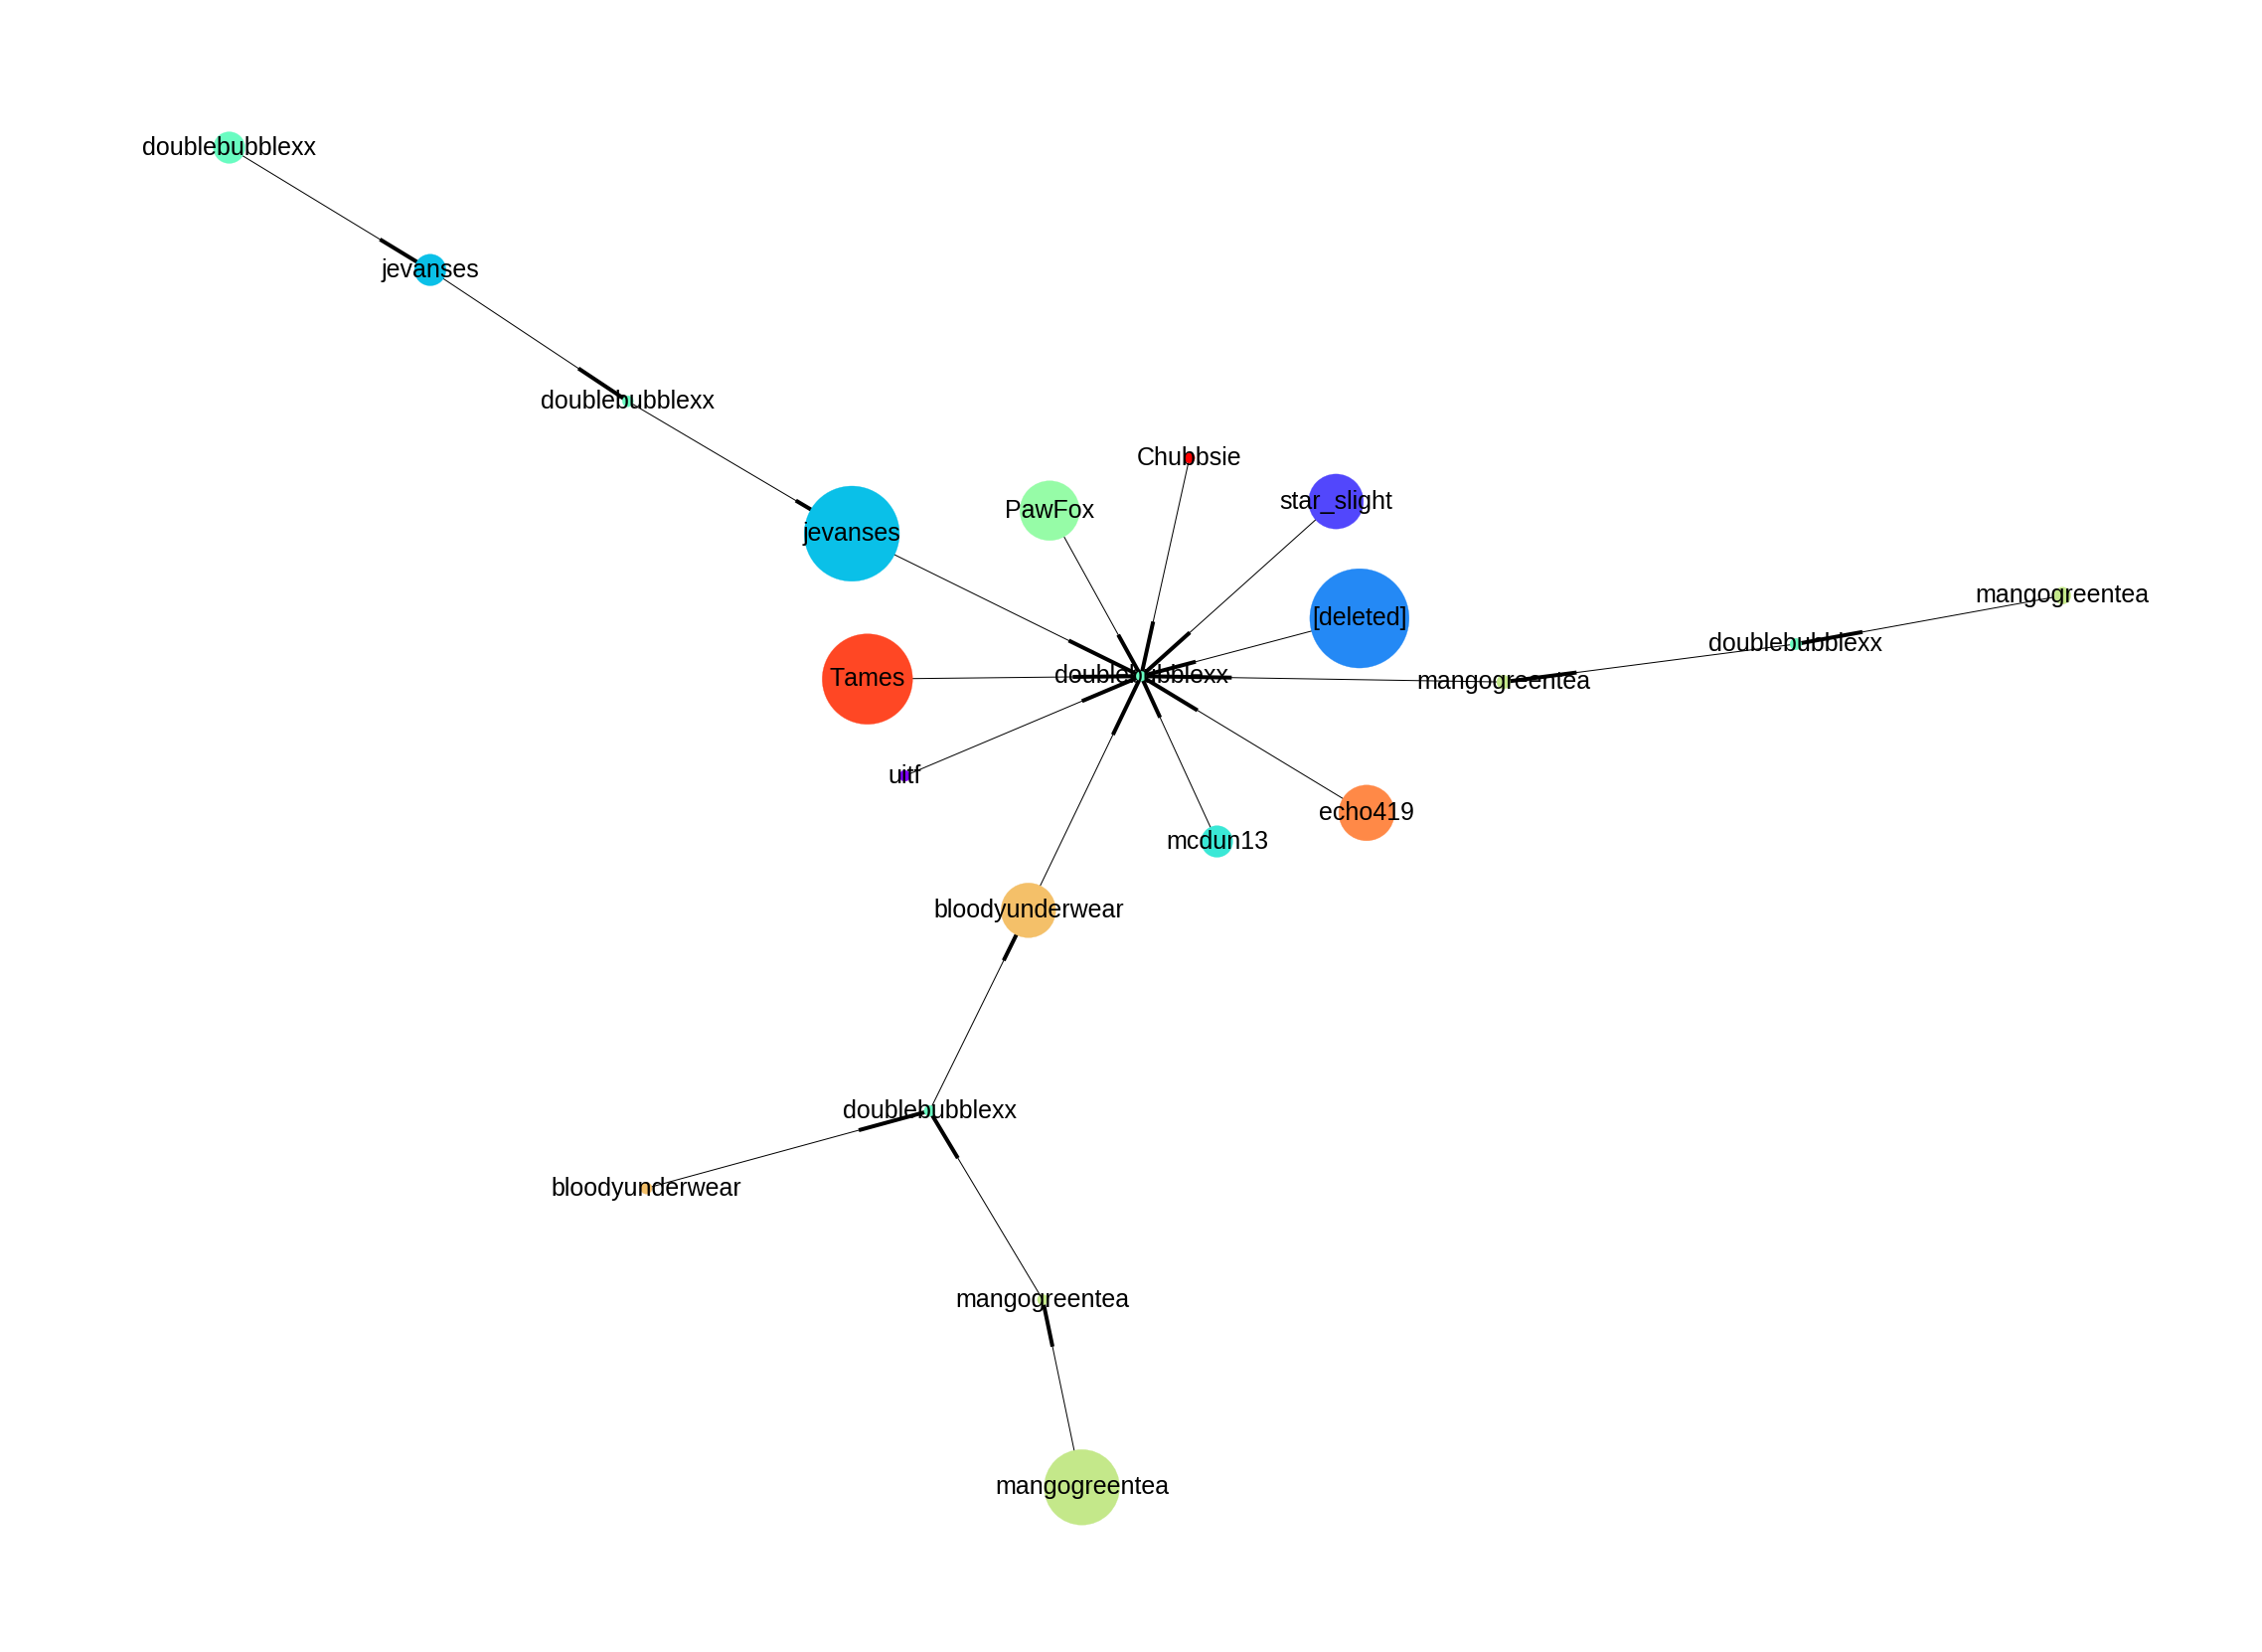

In [34]:
drawReplyGraph(allGraphs_SW[allGraphs_SW.keys()[15]])

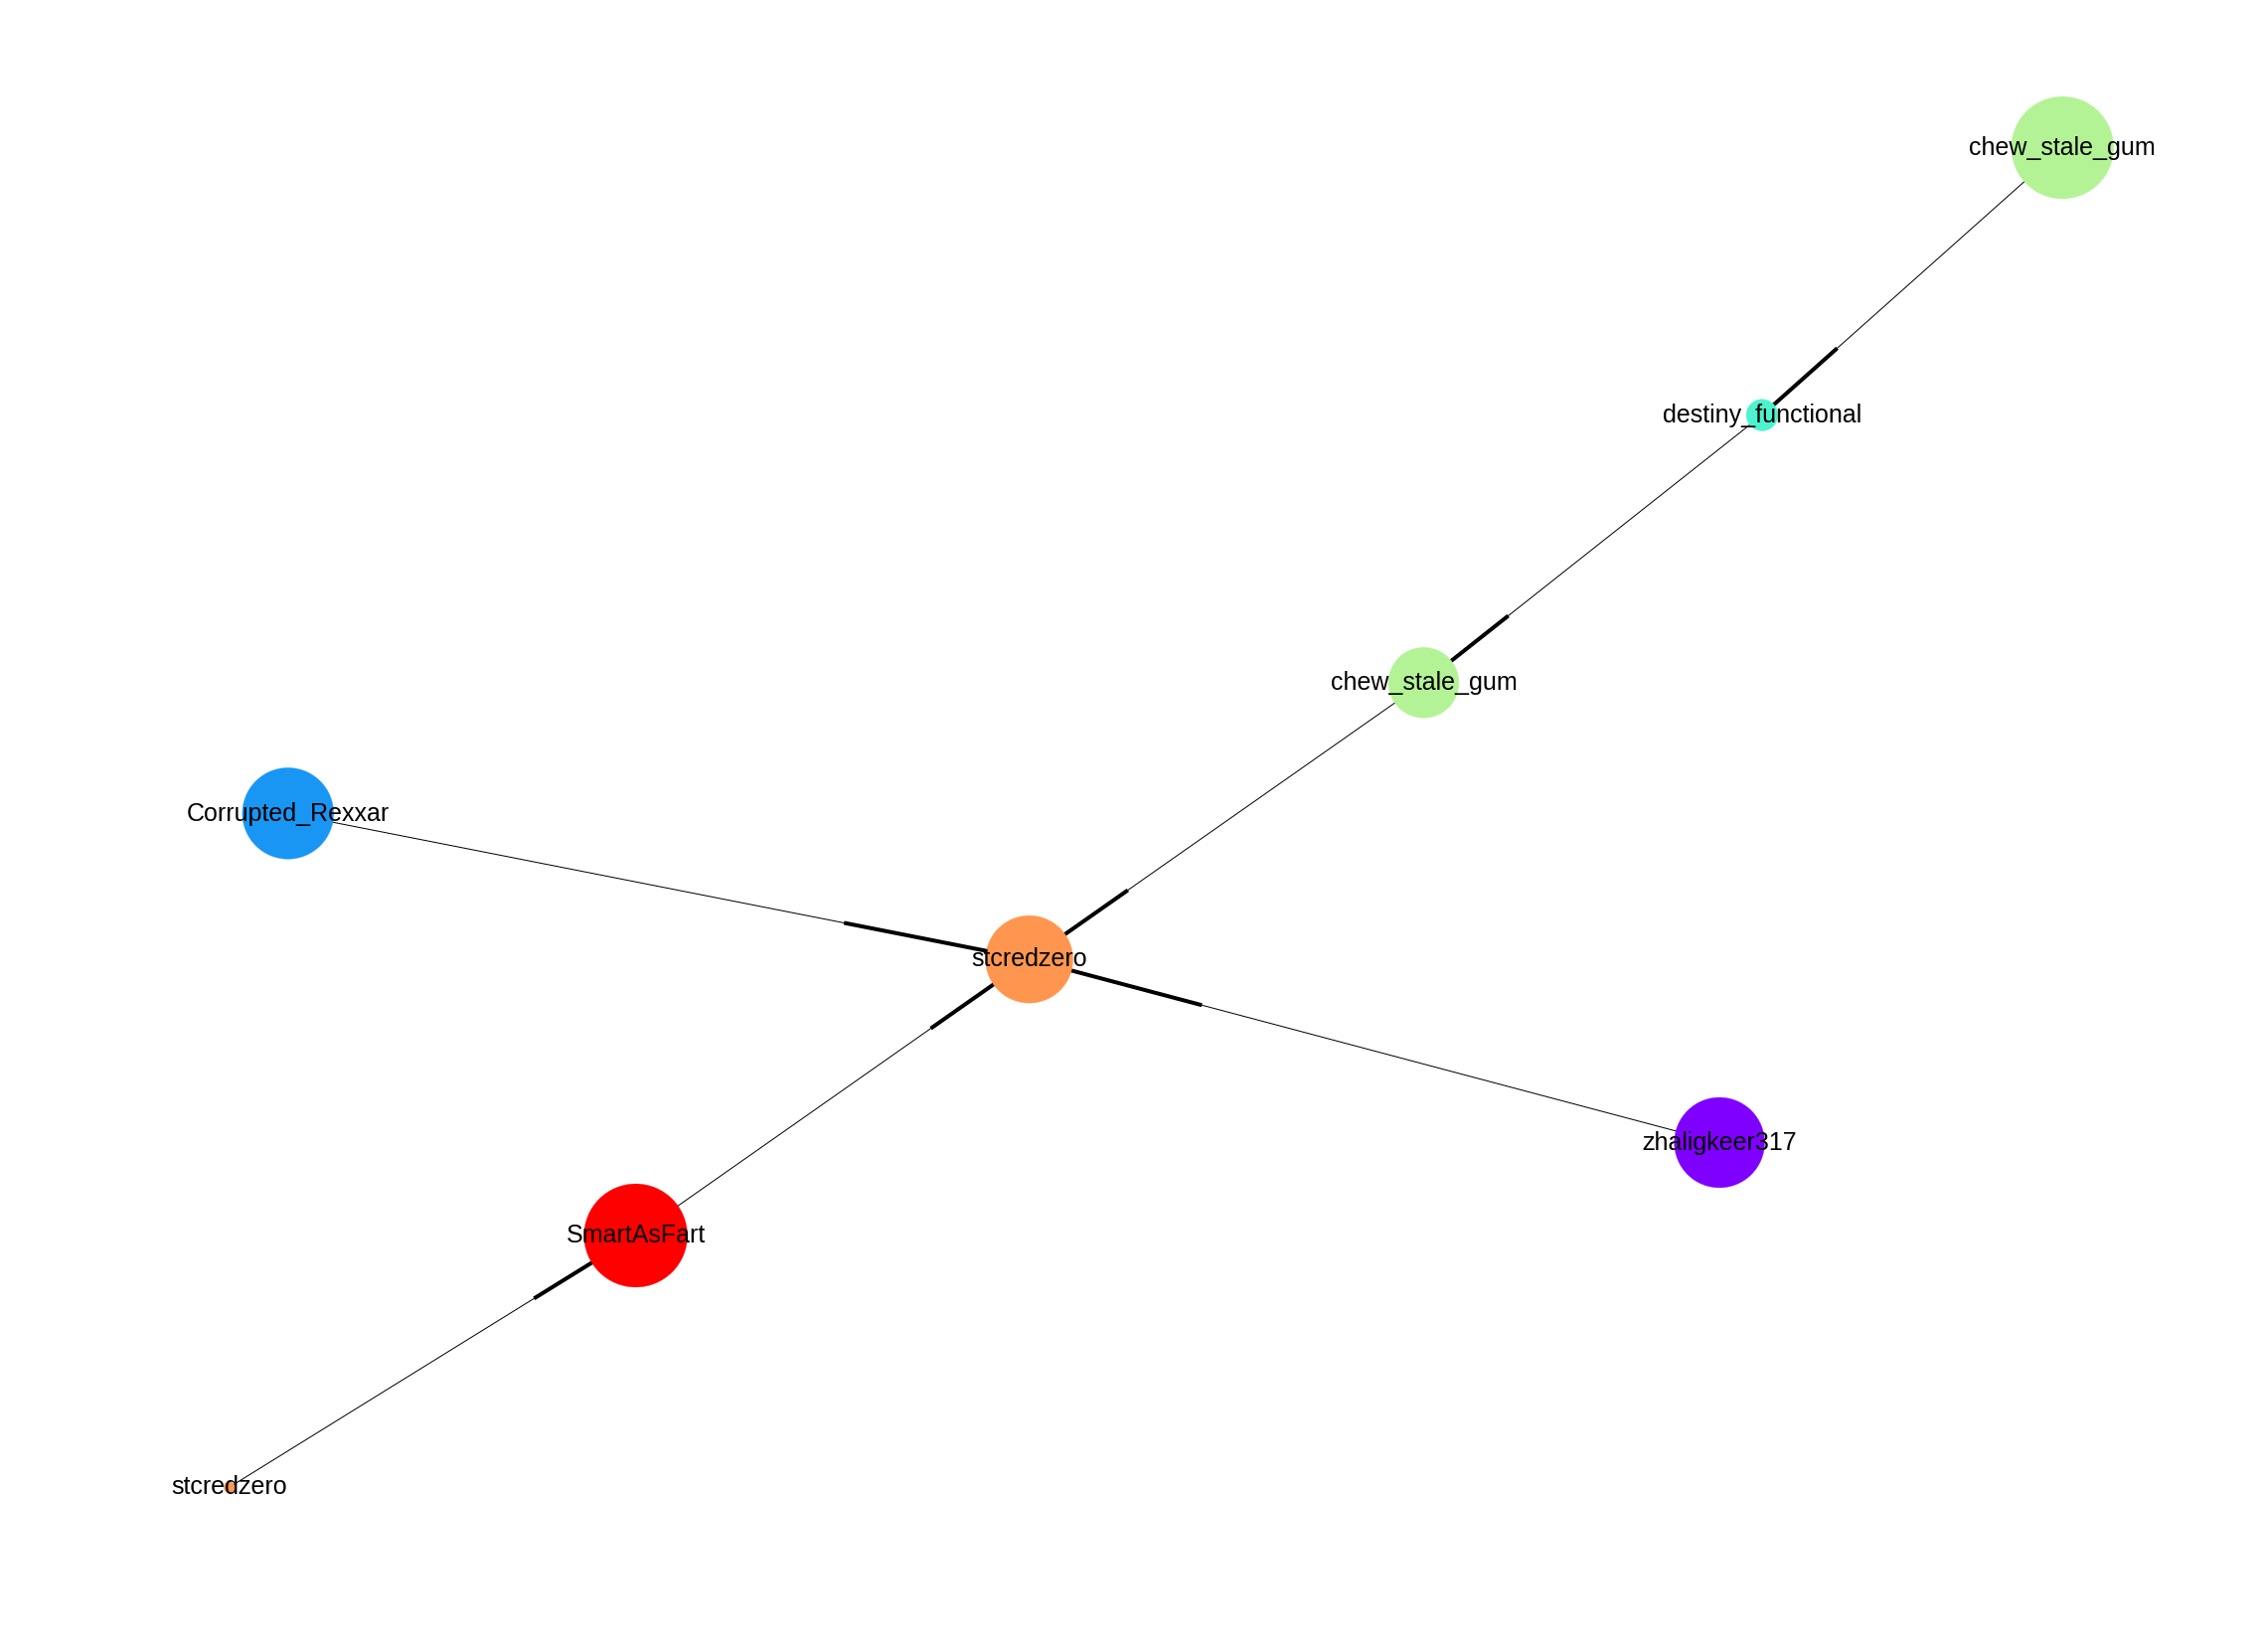

In [35]:
drawReplyGraph(allGraphs_BL[allGraphs_BL.keys()[150]])

In [36]:
userGraphs_SW = createUserGraphs(allGraphs_SW)

In [37]:
userGraphs_BL = createUserGraphs(allGraphs_BL)

In [38]:
print len(userGraphs_SW)

10157


In [39]:
#Save sampled USer Graphs: 
# with open("../Data/SW_ugraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=userGraphs_SW)

6


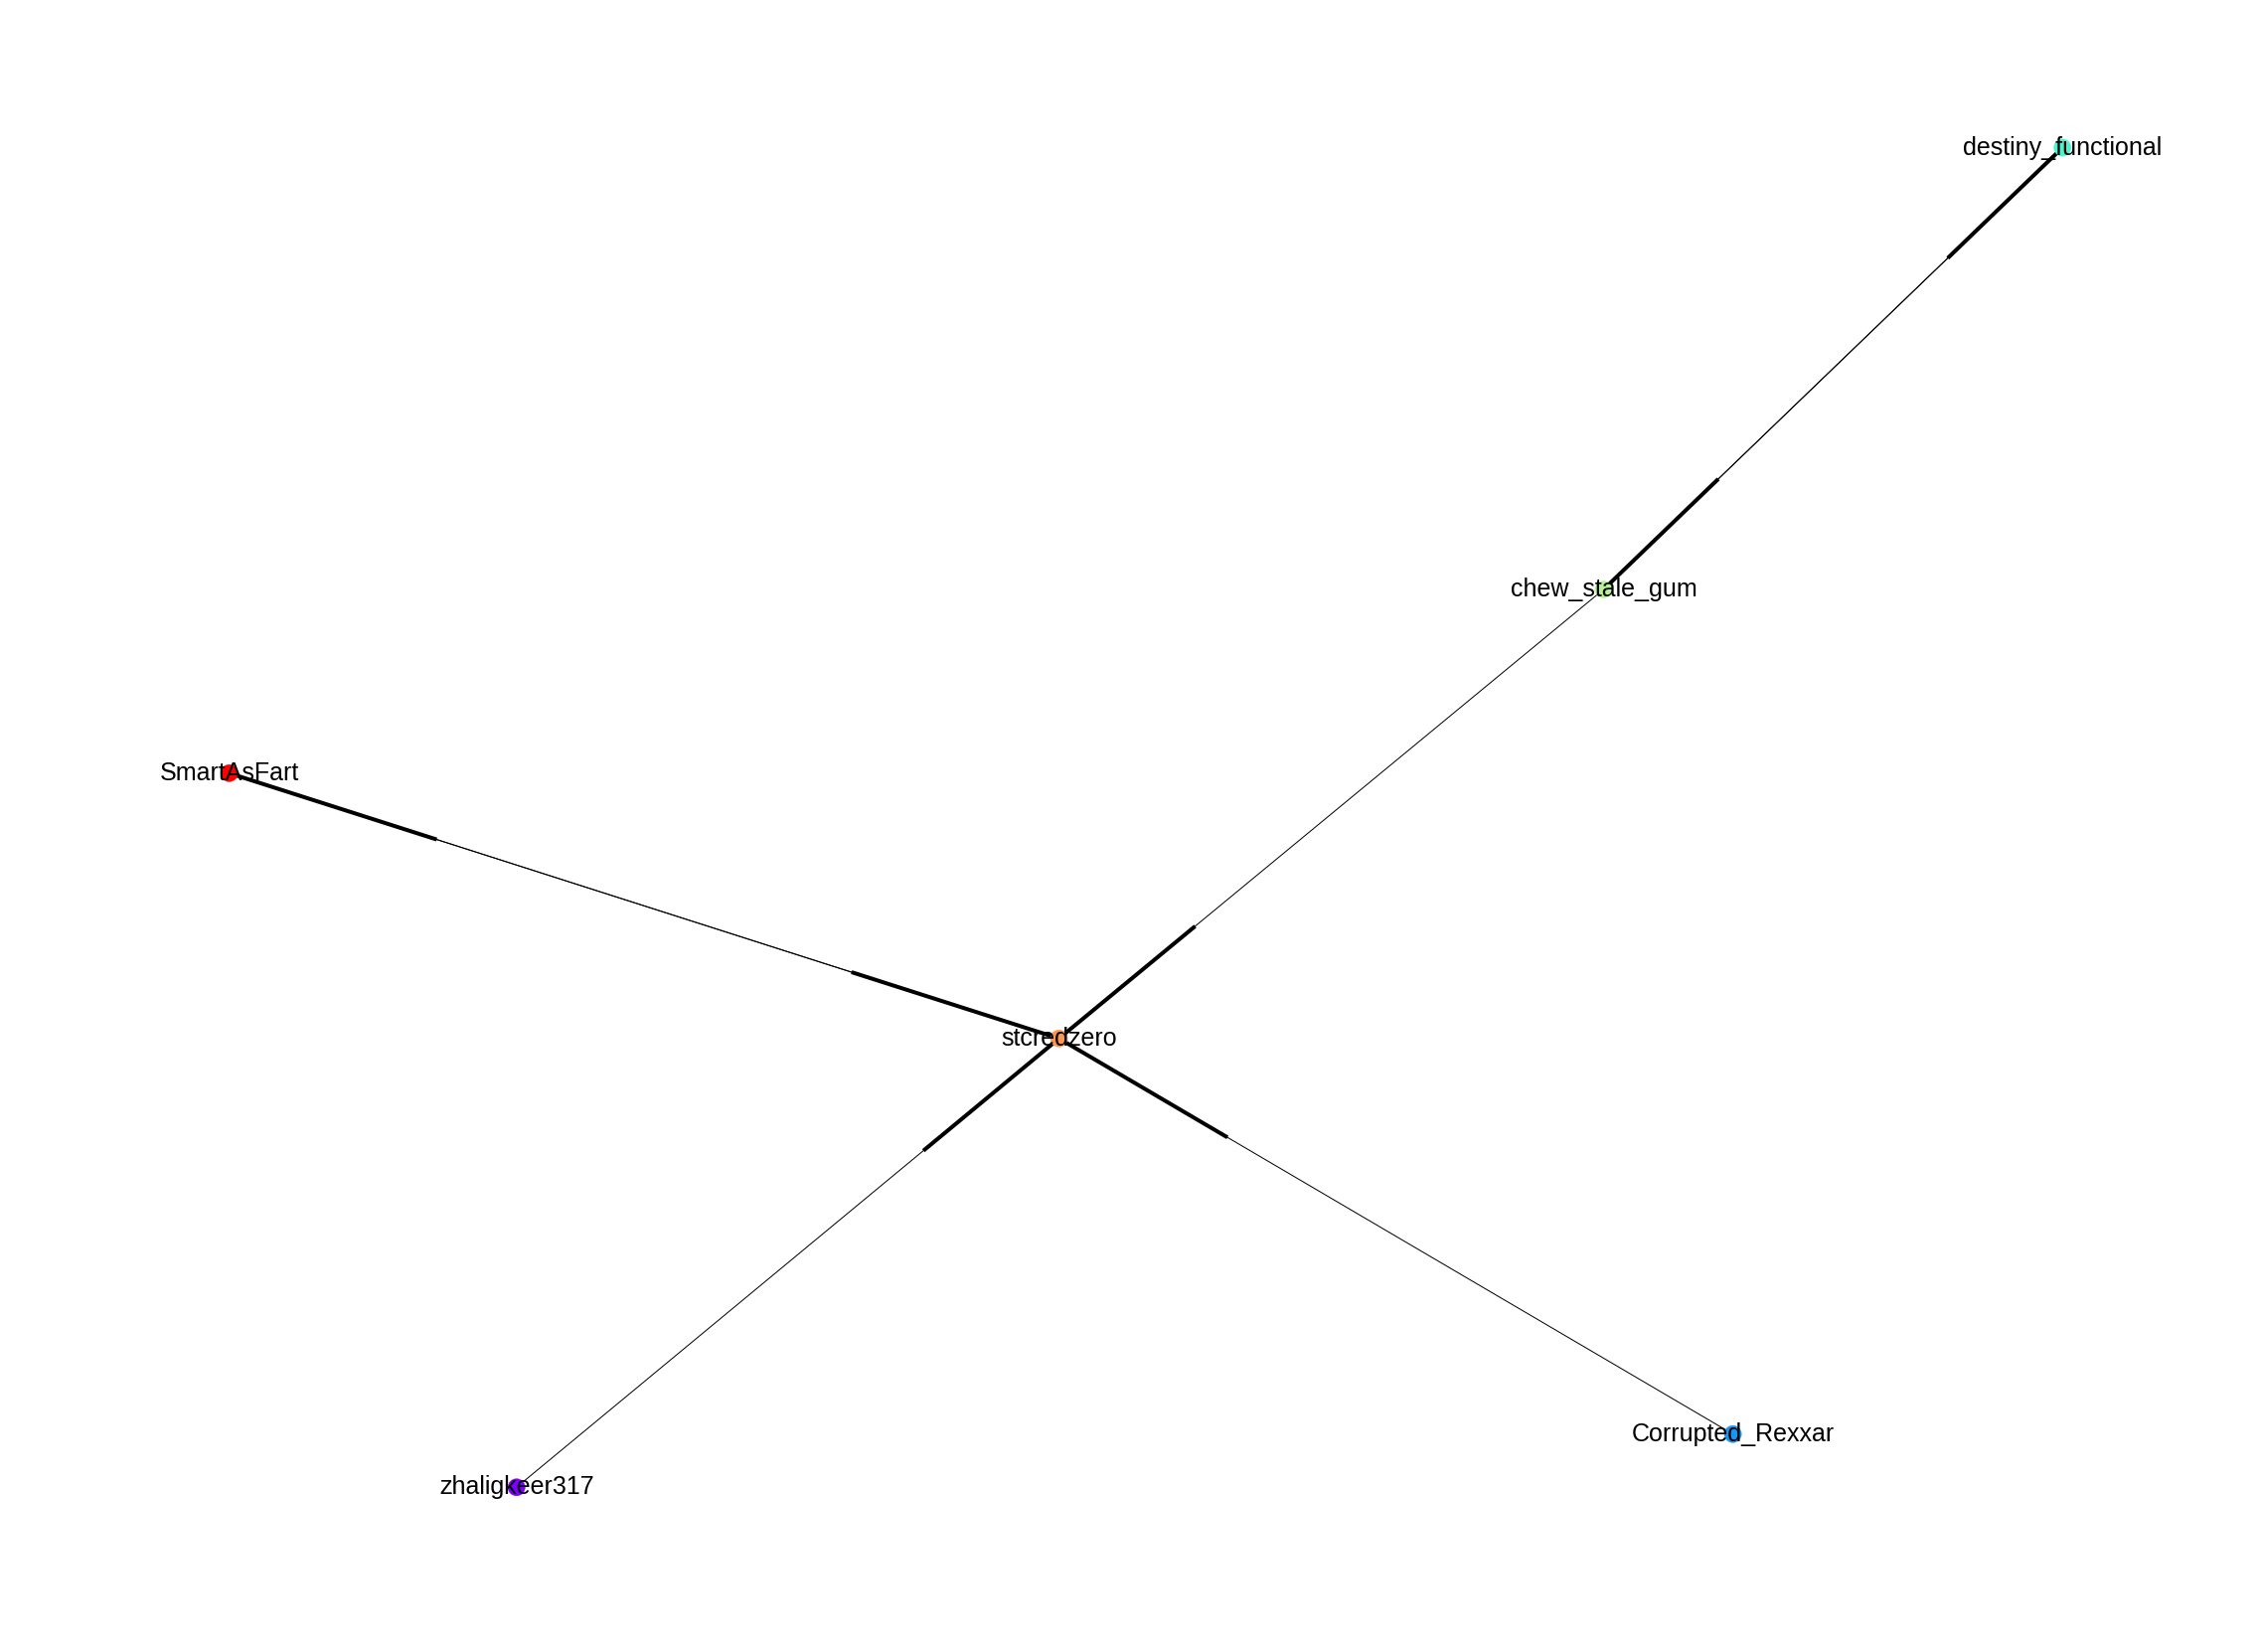

In [40]:
drawUserGraph(userGraphs_BL[allGraphs_BL.keys()[150]])

12


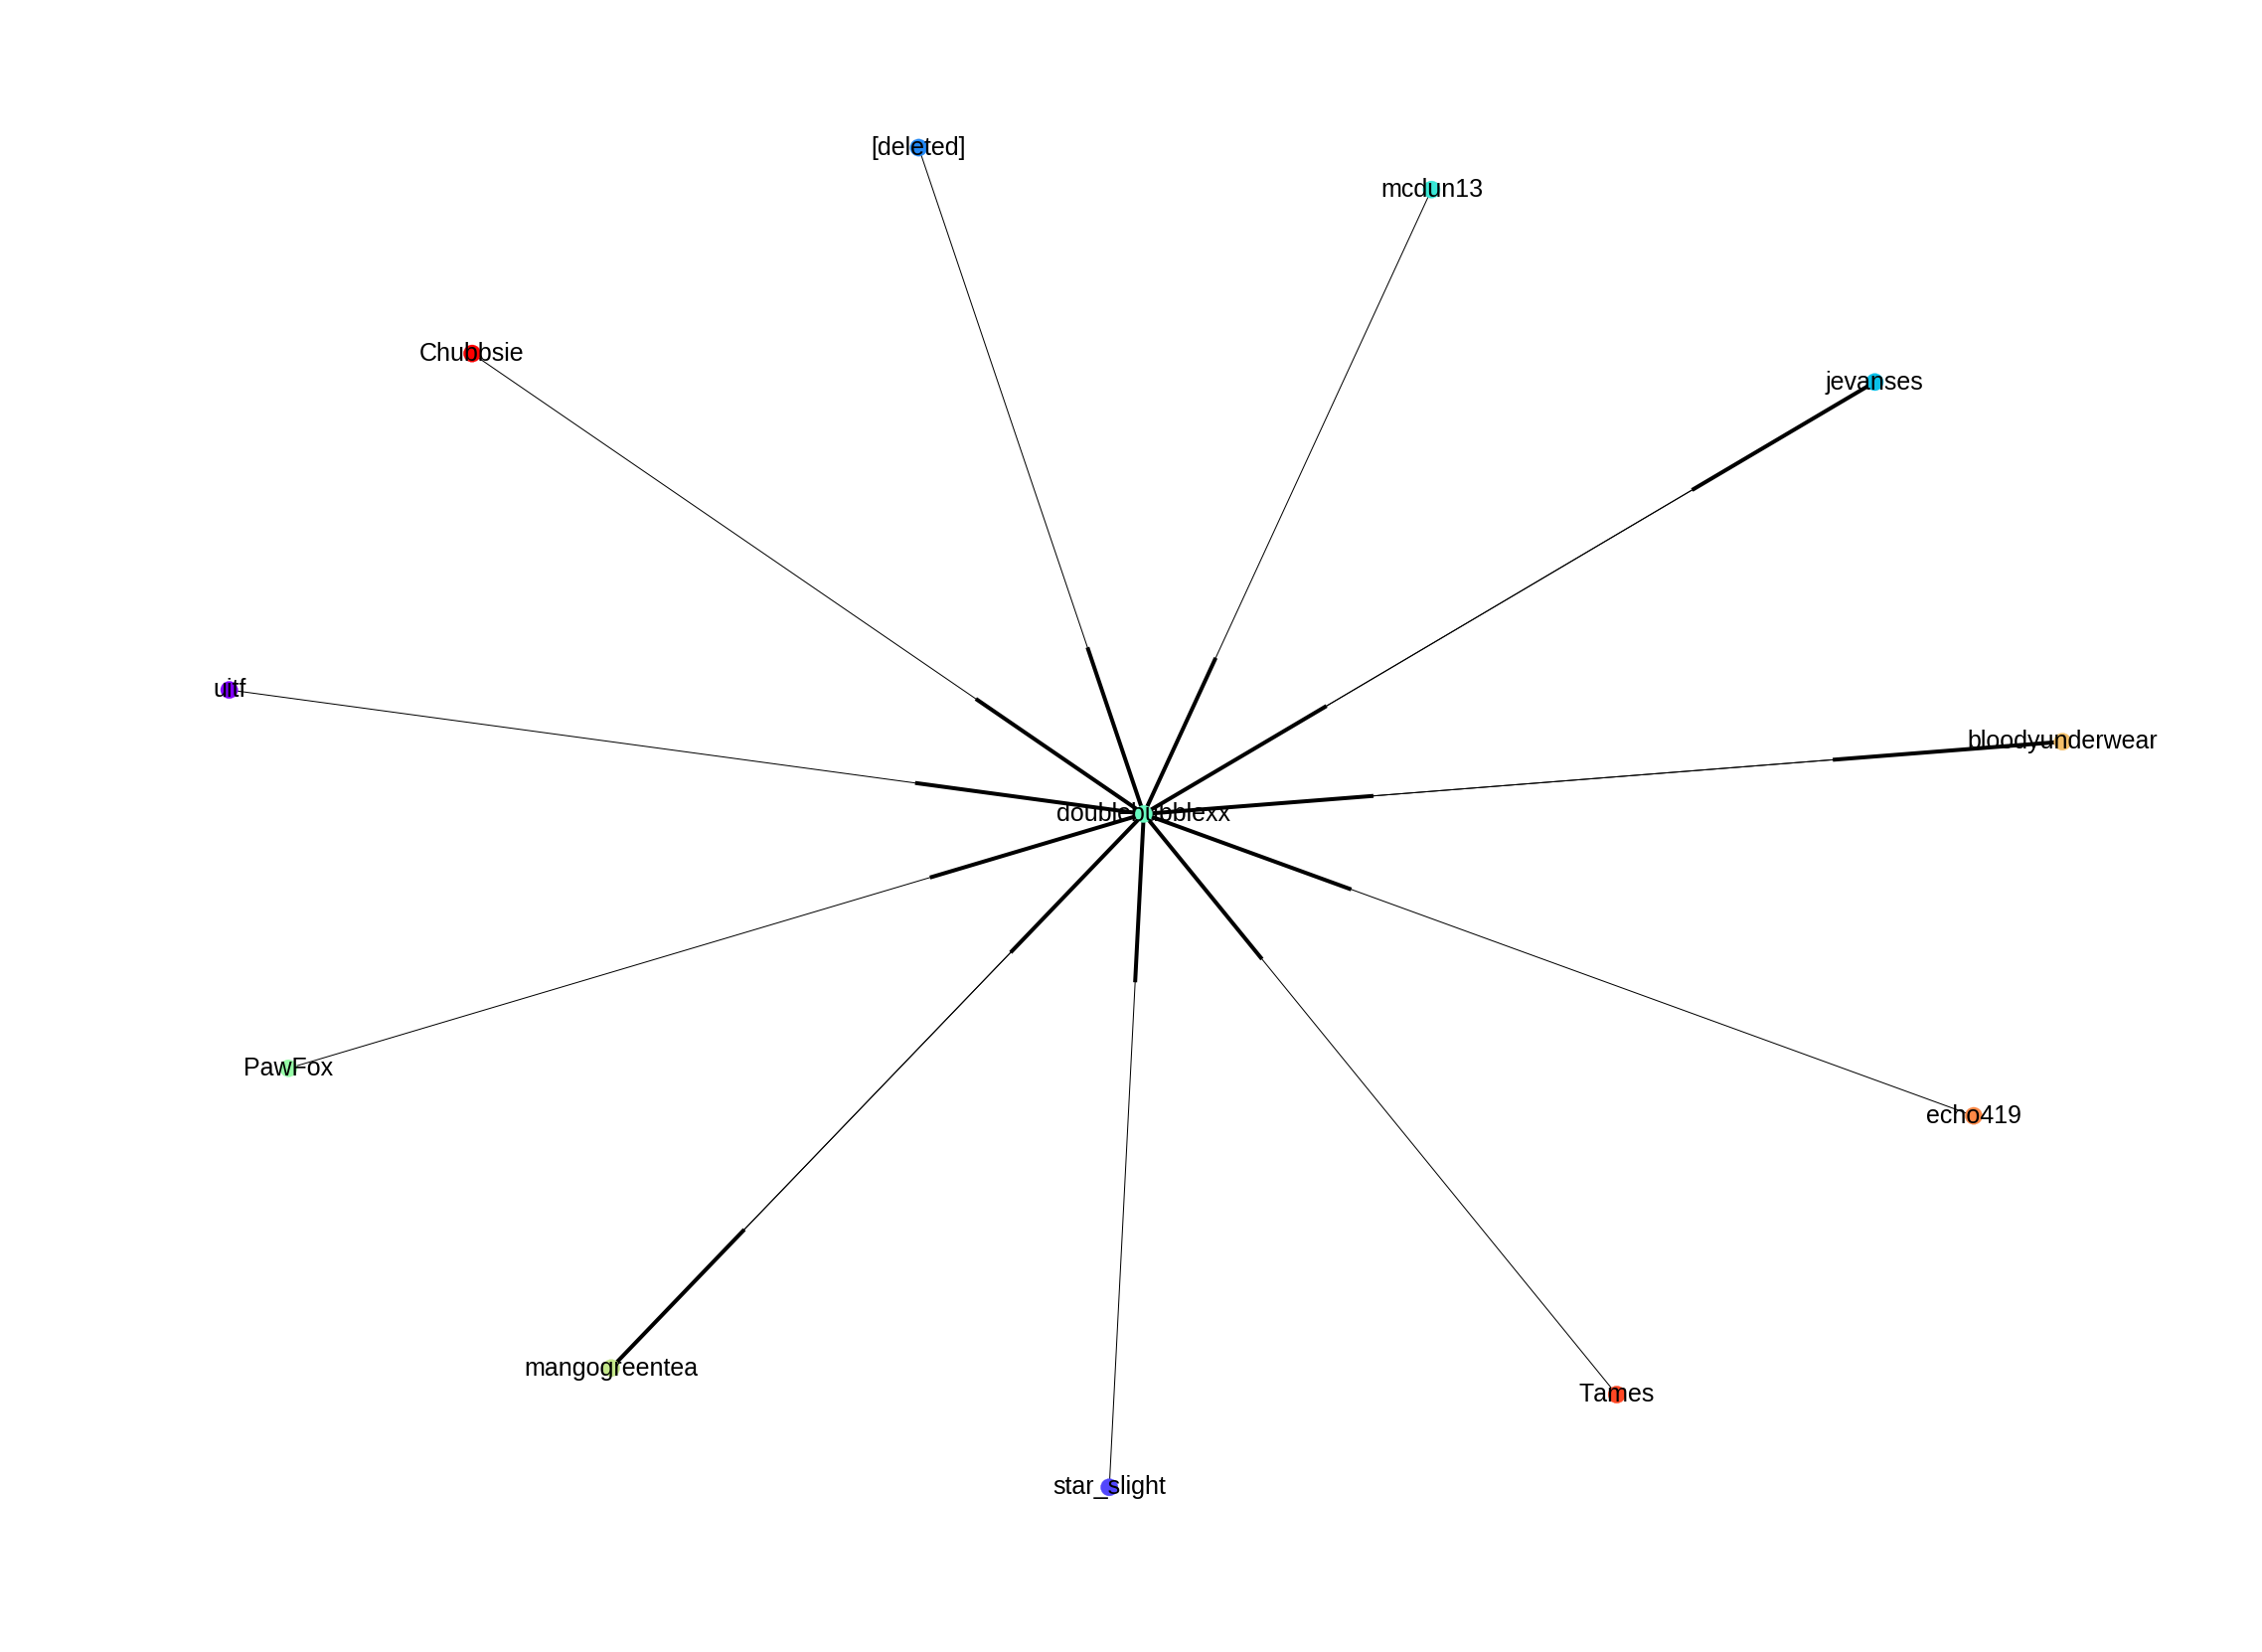

In [41]:
drawUserGraph(userGraphs_SW[allGraphs_SW.keys()[15]])

6


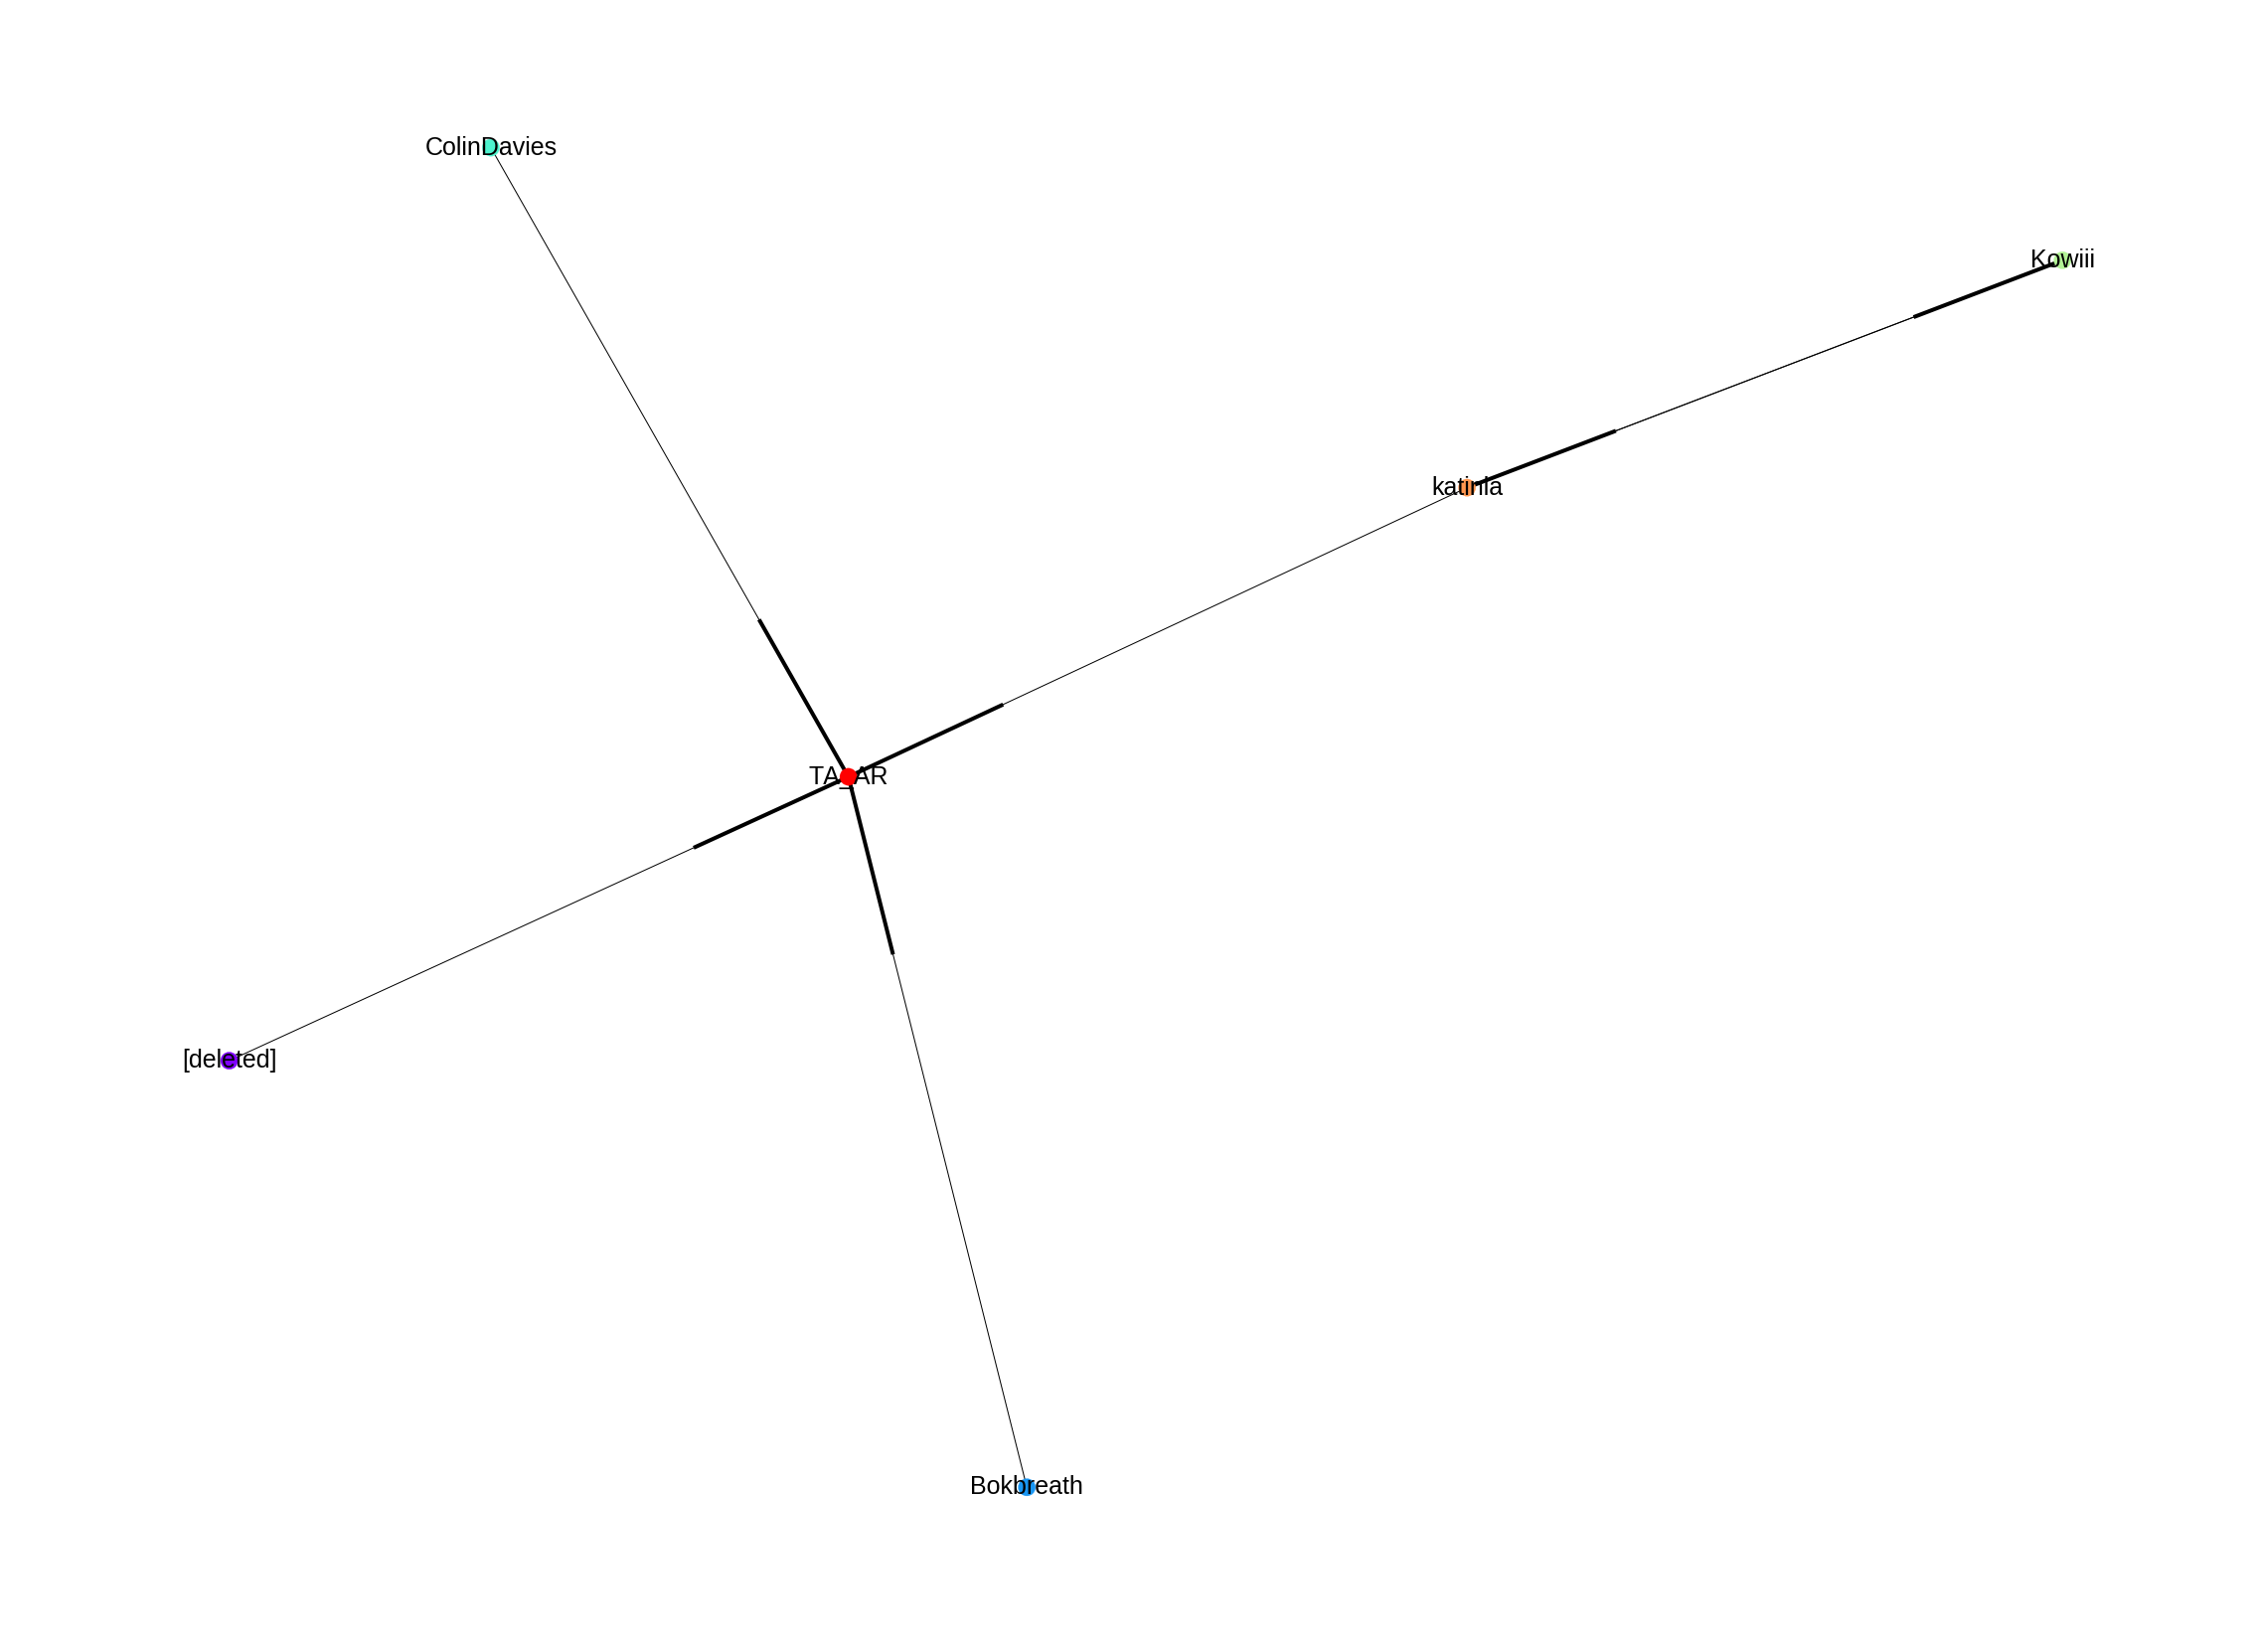

In [42]:
drawUserGraph(userGraphs_BL[allGraphs_BL.keys()[1]])

In [43]:
def getRootauthors(replyGraphs):
    rootAuthors = {}
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'depth' in g.node[node]:
                if g.node[node]['depth'] == -1:
                    rootAuthors[k] =  g.node[node]['author']
    return rootAuthors

def filterDeletedOPGraphs(userGraphs,opAuthors):
    print len(opAuthors) , len(userGraphs)
    filteredUserGraphs = {}
    for g in userGraphs:
        if opAuthors[g] != '[deleted]':
            filteredUserGraphs[g] = userGraphs[g]
    return filteredUserGraphs

In [44]:
opAuthors_SW = getRootauthors(allGraphs_SW)
opAuthors_BL = getRootauthors(allGraphs_BL)

In [45]:
filteredUGraphs_SW = filterDeletedOPGraphs(userGraphs_SW,opAuthors_SW)
filteredUGraphs_BL = filterDeletedOPGraphs(userGraphs_BL,opAuthors_BL)

10157 10157
1001 1001


In [46]:
print len(filteredUGraphs_BL) , len (filteredUGraphs_SW)

923 8053


In [47]:
sampled = random.sample(filteredUGraphs_SW.keys(),len(filteredUGraphs_BL))
print len(sampled)
sampledUgraphs_SW = {}
sampledReply_SW = {}
for k in sampled: 
    sampledUgraphs_SW[k] = filteredUGraphs_SW[k]
    sampledReply_SW[k] = allGraphs_SW[k]

923


In [48]:
filteredReply_BL = {}
for k in filteredUGraphs_BL:
    filteredReply_BL[k] = allGraphs_BL[k]

In [49]:
len(sampledReply_SW) , len(sampledUgraphs_SW)

(923, 923)

In [50]:
#Save sampled USer Graphs: 
# with open("../Data/SW_Sampled_ugraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=sampledUgraphs_SW)
    

# with open("../Data/AS_Sampled_ugraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=filteredUGraphs_BL)

In [51]:
def getDegreeDist(graphs):
    degrees = []
    for g in graphs:
        dist = nx.degree(graphs[g]).values()
        degrees = degrees + [k+1 for k in dist]
    return degrees

def getDepths(replygraphs):
    depths = []
    for g in replygraphs:
        depth = nx.get_node_attributes(replygraphs[g],'depth')
        depths = depths + [depth[k] for k in depth]
    return depths
        

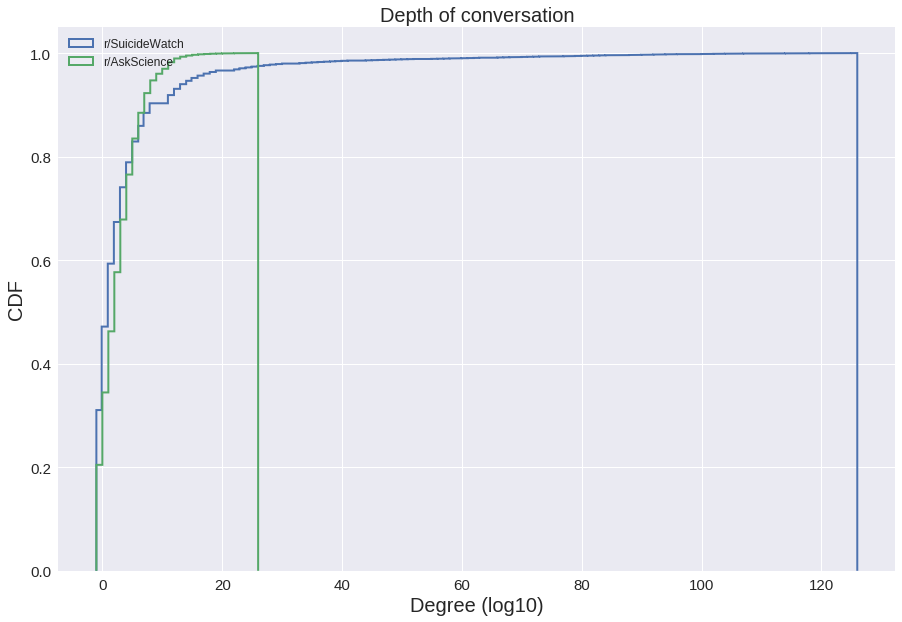

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(getDepths(sampledReply_SW), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(getDepths(filteredReply_BL), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Depth of conversation", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','r/AskScience'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [53]:
from scipy.stats import mannwhitneyu
def findMannWhitney(vec1 , vec2):
    if len(vec1) > len(vec2):
        vec1 = random.sample(vec1 , len(vec2))
    elif len(vec2) > len(vec1): 
        vec2 = random.sample(vec2 , len(vec1))
    else:
        print "Samples are same size, no need to resample"
    statistic , pvalue = mannwhitneyu(vec1, vec2)
    return statistic, pvalue
        

In [54]:
print len(getDegreeDist(filteredReply_BL) ), len(getDegreeDist(sampledReply_SW))

stats , pvalue = findMannWhitney(getDegreeDist(sampledReply_SW) , getDegreeDist(filteredReply_BL))
normstats , normpvalue = findMannWhitney(getDegreeDist(sampledReply_SW) , getDegreeDist(sampledReply_SW))
print stats/normstats, pvalue

19025 18872
Samples are same size, no need to resample
0.8927961324554828 2.2266487269465283e-87


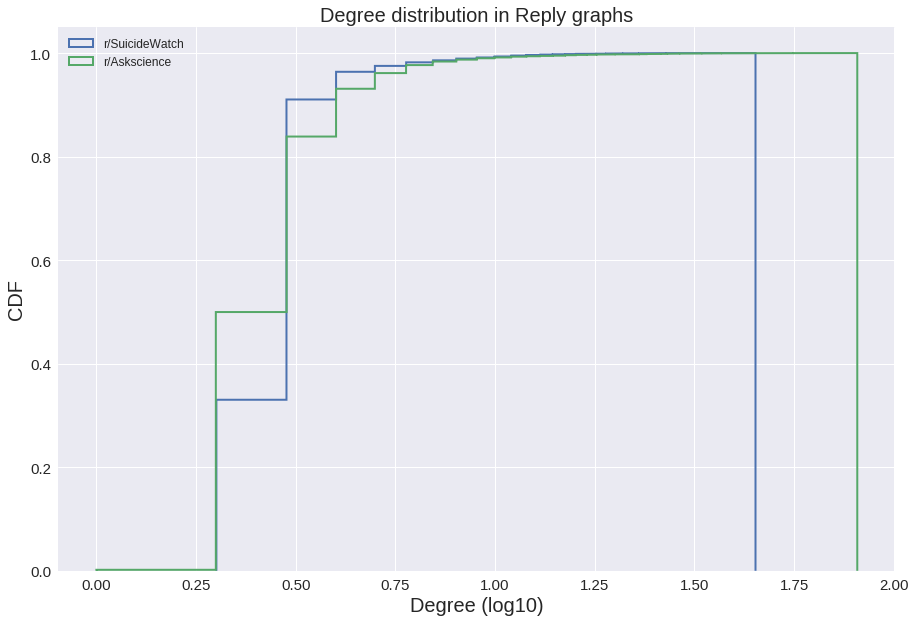

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(sampledReply_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredReply_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Degree distribution in Reply graphs", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','r/Askscience'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

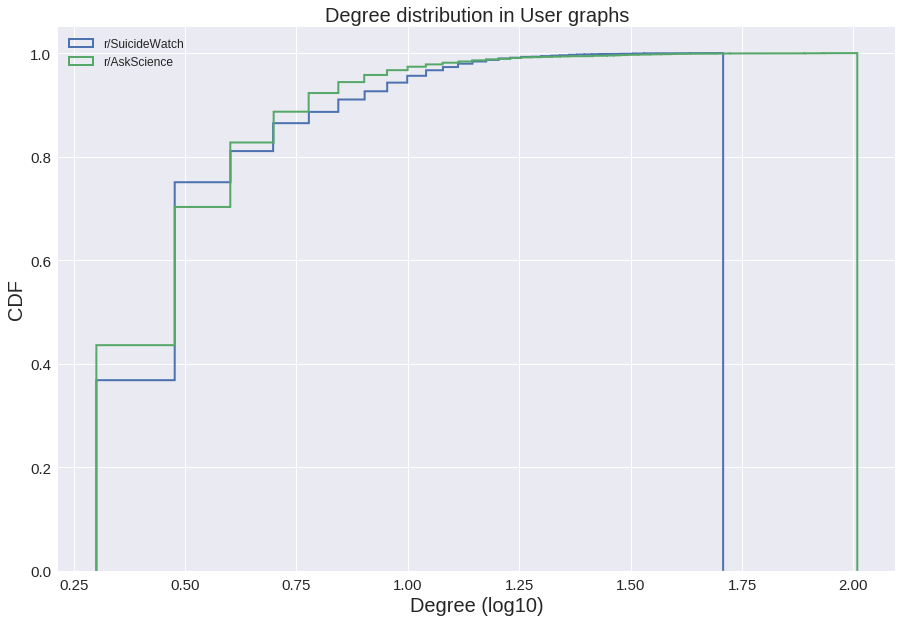

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(sampledUgraphs_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredUGraphs_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Degree distribution in User graphs", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','r/AskScience'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [57]:
print len(getDegreeDist(sampledUgraphs_SW) ), len(getDegreeDist(filteredUGraphs_BL))

stats , pvalue = findMannWhitney(getDegreeDist(sampledReply_SW) , getDegreeDist(filteredReply_BL))
print stats , pvalue
normstats , normpvalue = findMannWhitney(getDegreeDist(sampledReply_SW) , getDegreeDist(sampledReply_SW))
print stats/normstats, pvalue

6154 11766
158916572.0 5.324495945198519e-88
Samples are same size, no need to resample
0.8924077397162671 5.324495945198519e-88


In [58]:
import operator

def getSymmetricBehaviour(filteredUserGraphs,opAuthors):
    messageParti = []
    userParti = []
    BPusers = {}
    for k in filteredUserGraphs:
        g = filteredUserGraphs[k]
        BPuser = 0
        BPmsges = 0

        BPusers[k] = []
        for (u,v) in g.edges():
            if u != v :          
                toMsgs = 0
                fromEdges = 0
                if v == opAuthors[k]:
                    if u in g[v]:
                        BPuser +=1
                        print k , v , u
                        BPusers[k].append(u)
                        toMsgs = g.get_edge_data(u,v)['weight']
                        fromEdges = g.get_edge_data(v,u)['weight']
                        BPmsges= BPmsges + min(2*toMsgs,fromEdges)
        if len(g.nodes()) == 0:
#             print g.edges()
            continue
        userParti.append(float(BPuser)/float(len(g.nodes())))
        edgeWeights = sum([edge[2]['weight'] for edge in g.edges(data=True)])
        messageParti.append(float(BPmsges)/float(edgeWeights))
    return messageParti , userParti, BPusers

def getSymmetricOPResponses(replyGraphs , opAuthors):
    conversationChains = {}
    
    for k in replyGraphs:
        g = replyGraphs[k]
        authors = nx.get_node_attributes(g,'author')
        edges = g.edges()
        conversationChains[k] = {}
        conversationChains[k]['op'] = []
        conversationChains[k]['bp'] = []
        if opAuthors[k] == '[deleted]':
            continue
        for e in nx.dfs_edges(g):
            if k not in opAuthors:
                print "OP index not found"
                continue
            if e[1] not in authors or e[0] not in authors:
                print "Edge authors not found"
                continue
            if authors[e[1]] == opAuthors[k]:
                if g.node[e[1]]['text'] == '[deleted]':
                    continue
                conversationChains[k]['op'].append(g.node[e[1]])
                conversationChains[k]['bp'].append(g.node[e[0]])
    return conversationChains
                

def getTimeDistribution(replyGraphs,opAuthors):
    timeDist = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        for e in g.edges():
            if k not in opAuthors:
                print "Not the correct oplist "
                continue
            if e[1] not in authors:
                print "Author not found"
                continue
            if authors[e[1]] == opAuthors[k]:
                if e[0] in times:
                    timeDiff = times[e[0]] - times[e[1]]
                    if timeDiff == 0 or timeDiff < 0:
                        timeDiff = 1
                    timeDist.append(float(timeDiff)/60.0)
    return timeDist


def getAllTimeDifferences(replyGraphs):
    timeDiffs = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        for e in g.edges():
            if (e[0] not in times) or (e[1] not in times):
                print " Time not found"
                continue
                
            timeDiff = times[e[0]] - times[e[1]]
            if timeDiff == 0 or timeDiff < 0:
                timeDiff = 1
            timeDiffs.append(float(timeDiff)/60.0)
    return timeDiffs

def getSortedbyTimeEmotions(replyGraphs,opAuthors):
    timeDiff = []
    sentiDiff = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        sentiments = nx.get_node_attributes(g,'affects')
        opSenti = {}
        opTime = {}
        for n in g.nodes():
#             if n not in authors:
#                 print "author not found" + n
#                 continue
            if authors[n] == opAuthors[k]:
                opSenti[n] = sentiments[n]
                opTime[n] = times[n]
        if len(opTime)>1:
            sortedNodes = sorted(opTime.items(), key=operator.itemgetter(1))
            if sortedNodes[-1][1] < sortedNodes[0][1]:
                print "Wrong sorting continue"
                print times[sortedNodes[-1][0]] , times[sortedNodes[0][0]]
                continue
            timeDiff.append(float(sortedNodes[-1][1] - sortedNodes[0][1]))
            sentiDiff.append(opSenti[sortedNodes[-1][0]] - opSenti[sortedNodes[0][0]])
                
    return timeDiff , sentiDiff

In [59]:
allGraphs_SW[allGraphs_SW.keys()[1]].edges()

[(u't1_cely5zn', u't1_cely3ba'),
 (u't1_celyneb', u't1_celyhls'),
 (u't1_celzoe2', u't1_celyneb'),
 (u't1_ceslg49', u't1_cemtbqj'),
 (u't1_cemtbqj', u't1_cems1up'),
 (u't1_cely8h4', u't1_cely5zn'),
 (u't1_celyz24', u't1_celyneb'),
 (u't1_cely3ba', u't3_1uv2vj'),
 (u't1_celyhls', u't1_cely5zn'),
 (u't1_cems1up', u't1_celzoe2'),
 (u't1_cems27c', u't1_celyz24'),
 (u't1_cemzar2', u't3_1uv2vj'),
 (u't1_cemiid4', u't1_celyz24')]

In [60]:
# allGraphs_SW[allGraphs_SW.keys()[1]].node['t1_cb958j2']

In [61]:
convChainsSW = getSymmetricOPResponses(allGraphs_SW, opAuthors_SW)

Edge authors not found


In [62]:
# print convChainsSW

In [63]:
times = nx.get_node_attributes(sampledReply_SW[sampledReply_SW.keys()[1]],'time')
sortedNodes = sorted(times.items(), key=operator.itemgetter(1))
print sortedNodes[-1][1]

1256923521.0


In [64]:
len(opAuthors_SW) , len(opAuthors_BL)

(10157, 1001)

In [65]:
SW_OPTimeDiff , SW_OPSentiDiff = getSortedbyTimeEmotions(sampledReply_SW,opAuthors_SW)

In [66]:
BL_OPTimeDiff , BL_OPSentiDiff = getSortedbyTimeEmotions(filteredReply_BL,opAuthors_BL)

In [67]:
len(SW_OPSentiDiff)

581

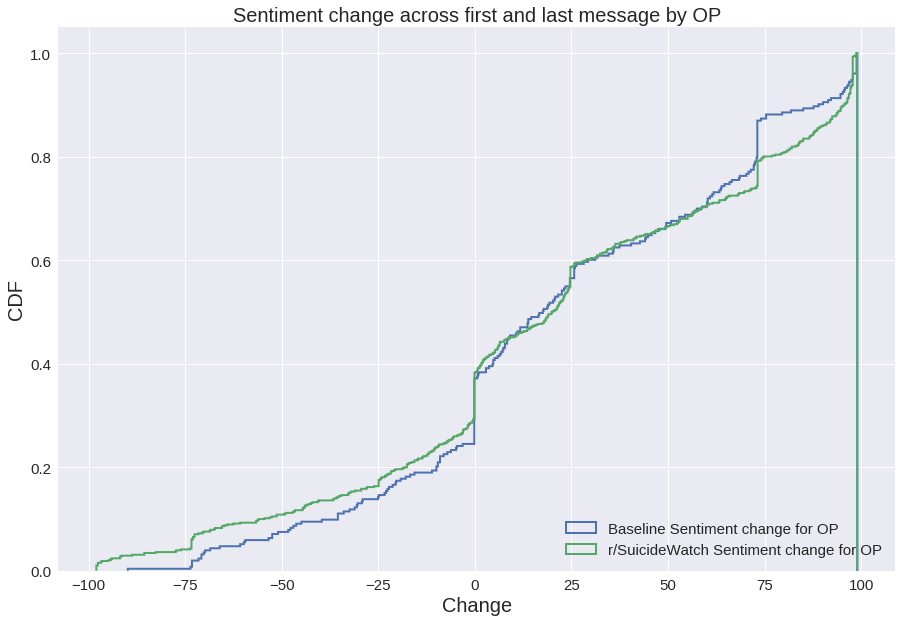

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n1 , bins1 , patches1 = plt.hist(SW_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Sentiment change across first and last message by OP", fontsize = 20)
plt.xlabel("Change",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Baseline Sentiment change for OP', 'r/SuicideWatch Sentiment change for OP' ], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [69]:
print len(BL_OPSentiDiff), len(SW_OPSentiDiff)

stats , pvalue = findMannWhitney(BL_OPSentiDiff , SW_OPSentiDiff)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_OPSentiDiff , BL_OPSentiDiff)
print stats/normstats, pvalue

253 581
30034.5 0.11537427984337956
Samples are same size, no need to resample
0.9384461560093111 0.11537427984337956


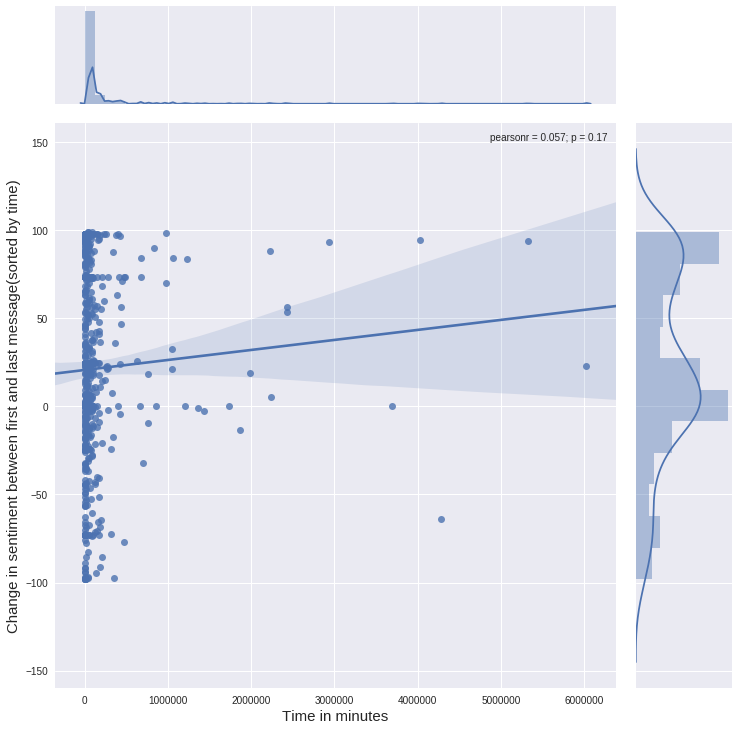

In [70]:
sns.jointplot(x = np.asarray(SW_OPTimeDiff) , y = np.asarray(SW_OPSentiDiff) , kind='reg' ,size = 10);
plt.xlabel("Time in minutes", fontsize = 15)
plt.ylabel("Change in sentiment between first and last message(sorted by time)", fontsize = 15)

In [71]:
len(opAuthors_BL) , len(opAuthors_SW)

(1001, 10157)

In [72]:
opAuthors_SW['nfuo5']

u'other-user-name'

In [73]:
SW_timeDist = getTimeDistribution(sampledReply_SW,opAuthors_SW)
BL_timeDist = getTimeDistribution(filteredReply_BL,opAuthors_BL)

In [74]:
SW_AllTimeDist = getAllTimeDifferences(sampledReply_SW)
BL_AllTimeDist = getAllTimeDifferences(filteredReply_BL)

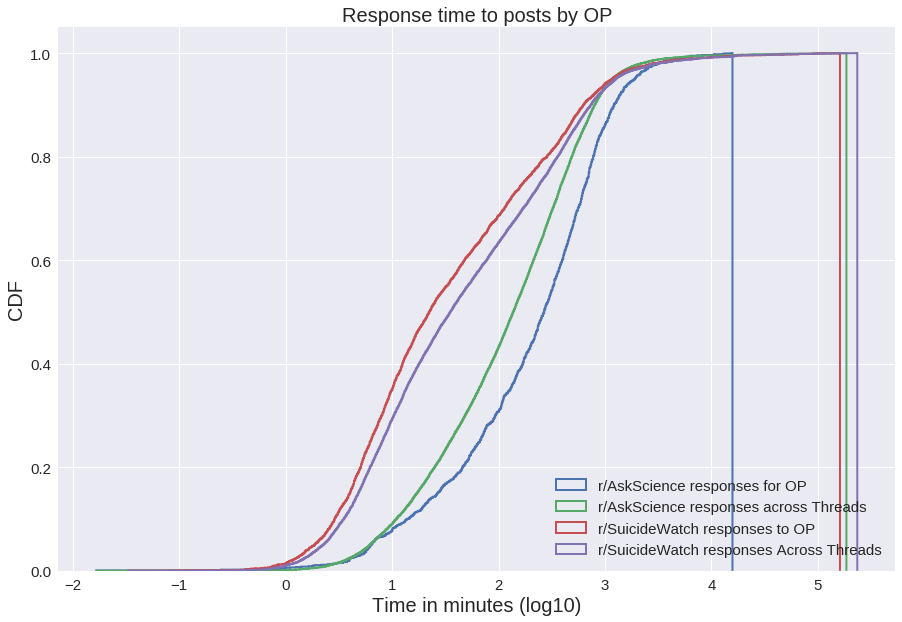

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(BL_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n1 , bins1 , patches1 = plt.hist(np.log10(BL_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(SW_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(SW_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Response time to posts by OP", fontsize = 20)
plt.xlabel("Time in minutes (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/AskScience responses for OP', 'r/AskScience responses across Threads' , 'r/SuicideWatch responses to OP' , 'r/SuicideWatch responses Across Threads'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [76]:
BL_messageParti , BL_userParti , BL_bpusers = getSymmetricBehaviour(filteredUGraphs_BL,opAuthors_BL)


7i6343 NuclearJezuz atomfullerene
7ext3x Hitmonjet bluemuffin78
7ix0gj A_Dash_of_Time warm_kitchenette
7eyl3z mfb- goersen
7jm3c1 conservio wurly-curly
7i00pg PM_Me_Unpierced_Ears Aosih_
7fq8oy Shlkt mrterrbl
7g7chh The-Legend-26 ReallyMeNot
7g3uwv Wolfblader5657 iorgfeflkd
7e9zq2 Fe_man_ civiltongue
7e9zq2 Fe_man_ danby
7g4vjb NoNazis Gandalf-The-Fuscia
7gn4uu LjSpike cantgetno197
7fqc04 Svemirzuk TooFewChars
7h4ahd orangegluon here-for-karma
7dnurc UltimateAlgorithm Chad_bisceglia
7f7asj nogreatshakes CancerousChameleon17
7fst2c GelekW MasterFrost01
7fst2c GelekW mfb-
7hijsd destiny_functional cuicocha
7gkz3m IHateTexans cantgetno197
7io18w wonkey_monkey akambe
7e17ib shamdalar NotJordy
7fb1ed FriendlyCraig synapgorithm
7e1q8o Daddycynical69 kinyutaka
7gyk9p Quaildorf SharlBird
7dpk2q Astromike23 Aless_o14
7do1m9 monkeynose Rittermeister
7gex5z RobusEtCeleritas justalizardking
7dhxc8 Iroh_Koza 1096bimu
7hqtjm Forty__ datonedankmeme
7ep12w StardustSapien [deleted]
7exlm0 danby mfb-
7f

In [77]:
SW_messageParti , SW_userParti , SW_bpusers = getSymmetricBehaviour(sampledUgraphs_SW,opAuthors_SW)

1vwagy I__Care Soundoftheplanet
9zdm8 gianniducati56 Little_Kitty
9zdm8 gianniducati56 [deleted]
9zdm8 gianniducati56 RoundSparrow
9zdm8 gianniducati56 topsul
dtz1w terqui canttakethis
8e4oj Buckleydog Ostrich159
2pc100 CharlieMayhem Whitneh
2pc100 CharlieMayhem lumbarmoose
jjz0y 1nsider fainan
ez61f bipolarcoaster dee_lee
35w4wv Opticks1704 Brandon_Kwon
239d6k Pinkamena_R_D_Pie Larry-Man
3hcwj3 mypoosmellsfunny [deleted]
3hcwj3 mypoosmellsfunny hermes369
1w3kfc t1tg noaddrag
39idus INeedSomeHelp2328483 [deleted]
39idus INeedSomeHelp2328483 MintChapstick
39idus INeedSomeHelp2328483 throwaweight7
nq06t Bouda PsychPatient99
nq06t Bouda PixelWrangler
2jisdq bpdthrwwy wd3war
2jisdq bpdthrwwy sept27
1gr6c1 redline201 minds_gone_blank
1ljhl4 lokijoker oh_bugger_balls
33f43g mrwbrightside [deleted]
2ohzml hjjjgfjddiuguigjhg [deleted]
2ohzml hjjjgfjddiuguigjhg TazzD
fm86w GeeMandy can_somebody_talk
1w9bix Choke_M devin_d
1w9bix Choke_M [deleted]
1h35p8 matt123macdoug AzaleaHaze
1hjrz7 2ntwins 

117j3g SaMo2906 [deleted]
117j3g SaMo2906 Estehbahn
117j3g SaMo2906 topsul
117j3g SaMo2906 jackrobinson95
2abe0m zigzwag JackyCS
14nec4 omnipotant noclaptrapzone
18kf6n haxel367 meow_thug
18kf6n haxel367 offlightsedge
10k0is Lethe_Bramble Pookajuice
10k0is Lethe_Bramble Sir_Trollzor
10k0is Lethe_Bramble scatterbii
dqzdv losercantdance SWthrownaway3
1zjleq Lucifuture mrowa17
1jj3ym nohopetocope Ninebythreeinch
38gvwn Nightfox213 smishmortion
d9hhk dragoonies lonelygirl187
vx3vm PlotCitizen SupremeAnalyzer
35lihy Orelationshipgonebad ruthluss
24ba3u abagof Starship_Fighter
1rowyw outinthestix no_goodbyes
17ixa8 animaculecracker GenBlase
ex2d2 th55111 behm28
iw5v4 RoosterSheep vespavirgin
iw5v4 RoosterSheep SQLwitch
3cdenm pathfinder89 [deleted]
3dp34c nurwegwerfname legitangel
3dp34c nurwegwerfname [deleted]
1mal0j HP_Housecat DarkerBeforeDawn
2q0i11 Terex80 questionableacts
2nwj8n themaskedpumpkin shadowlurker_j
21z2gi skygirl47 unknownandunseen
1xjssk glorytohisname killme7
1qlmxa xXFe

In [78]:
SW_messageParti_all , SW_userParti_all, SW_bpusers_all = getSymmetricBehaviour(userGraphs_SW,opAuthors_SW)

vj5co [deleted] zombiemeds
fjatc drunk_otter dead_by_saturday
1x6boy Altruizzy throwawayacct424
97akw Faustyna [deleted]
97akw Faustyna PossiblePerson
3ci391 [deleted] peanutpeepz
s79sc logospogos284 fuck_usernames123
2tjz9s yolomgwtf BearDidIt
b0mvj lurkergirl itisover
ci9lz Agnostix dontwannabehere
24gto5 Soletrador youcaughtthelight
29en0c LostInAPicture Ingvarkarlsson
29en0c LostInAPicture throwawaybcirl
37zjrf the_wheaty pathfinder89
1cz1sd RemFrank KimmyJongJong
2wo3jj neminemexcusat throwitbitch1
1h1vqu [deleted] nopointnow
1h1vqu [deleted] rainbowtwinkies
16hiex chooby3000 griffin_desantos
e1hjc drqxx [deleted]
osxp1 no1one bleepitybleep
osxp1 no1one [deleted]
osxp1 no1one skekze
2kpspy [deleted] bktolife
2kpspy [deleted] Hasherss
2kpspy [deleted] Starship_Fighter
2at60d [deleted] Jessica-EdgeBlade
1p4pqm [deleted] TMRobotic
2hip0u Chaos_apple Missing_love
xwu8q blondin 1800HEYGTFO
1dqizr ta001001 buba_fett
1jg4bt blipsycat dudelikeshismusic
1jg4bt blipsycat [deleted]
e6utj dsw

295swf TryToFlyHigh CharlieMayhem
sszrg [deleted] dreamingdead
1514y5 RoundSparrow Ijus
2mswth luciussullafelix Flaxmoore
196uu1 dermo529 they_found_me
2t8741 justforamoment- Stthads
2t8741 justforamoment- Derpameaus
dofa0 Carmac throwitallaway8299
3btm8n [deleted] finallycheckingout
1w7ji3 Karissa36 throwawaylife33
fut25 ifollowyourlead [deleted]
39tamn [deleted] Decent-84
eawp9 oddball01 whybother90
232tbm [deleted] TheGattMan06
37ygo5 e0893lewis Valserker
2bx131 wrcmdsaul ajakk
2bx131 wrcmdsaul [deleted]
dv35a RosieLalala ridicule
yf4d7 nomaroma CigarettesAndHope
2uen0g ThrowMood _Oisin
1bhgik WowPrettyLights I_love_Kat
o2duw Flashdark Searching4hope
axqrz nonamejoe RobSpewack
2ij5ah is_throaway [deleted]
2o0gzp Gravitron34 [deleted]
1zunnf [deleted] PlushNunchuck
1a5q2f CTRMYS ringsnmodules
ig7et pacg Throwaway7756353
2bftt0 wrcmdsaul [deleted]
2bftt0 wrcmdsaul 12awr
2bftt0 wrcmdsaul Neddy93
u8jte htnsaoeu selonnan
3ghqgr erasse11 melusine00
1zfx8u reaching-out thefinalthrow
1gpza8

291rgl ivelostcount Troic
mm6qt fallingwithoutsafety hugsforeveryone
mm6qt fallingwithoutsafety MissRambeau
mm6qt fallingwithoutsafety DiableJambe
3a8pwh Sacheverell_ gcdream
pxzgt [deleted] failure4lasttime
19uwzt Blucatt icanusethis
19uwzt Blucatt [deleted]
19uwzt Blucatt Raymond890
2bra4y vaginaainthandicap [deleted]
2bra4y vaginaainthandicap ctrl_alt_believe
2dawrm [deleted] letsgoiowa
2om8vt ja18960 walktotheedgeoflife
1hex8t stripedytiger sssyyynnn
13kjee Twistntie [deleted]
13kjee Twistntie return-of-the-mac
13kjee Twistntie MrsVentura83
13kjee Twistntie Holmesymcgee
13kjee Twistntie sotiredofdarkness77
15hi3m [deleted] swqq
lulak Psy-Kosh Imsecretlyfapping
1v5v0s tomtom24ever onethirteenforteen
1rognw whippogirl16 [deleted]
1rognw whippogirl16 Delixcroix
1rognw whippogirl16 myowmyow
1rognw whippogirl16 XisanXbeforeitsakiss
2ds6pr sw1928 Queen_of_France69
2b90b3 [deleted] fifthninjaturtle
2ug0xw [deleted] BookWormBeccy
8lag0 [deleted] someoneotherthanelse
qf7ty gnkbot whatsthepo

2xmyah llllllllljbug CharlieMayhem
2xmyah llllllllljbug Whynot---
9pg9r Rambis duckysfirst
e3kjg [deleted] Soon2Be
1jrt8a lastresort09 Poppyf
ms59j [deleted] ChiefThief
ms59j [deleted] NoHopeOfBeingNormal
166c2j acal1995 igiveuponthislife
1tuf0t [deleted] fuckthislife23
164ni0 ineedsomehelpbad [deleted]
164ni0 ineedsomehelpbad mrbrowntastic
164ni0 ineedsomehelpbad tgjer
164ni0 ineedsomehelpbad eh-lyssa
164ni0 ineedsomehelpbad ThatguynamedCarl
164ni0 ineedsomehelpbad isleepinahammock
2wppge xiao_baitu [deleted]
z4are [deleted] ODedonlifeitself
1ij5sn Why_try_anymore 0root
1ij5sn Why_try_anymore moondollie
1bbvt0 [deleted] Tobeornottobe3
qje0b [deleted] doubtmyself1
2n5ql0 ganjafarm XerusMarsman
z7mmu [deleted] NicoleDaisy
2zri8c safescience [deleted]
3es6i6 [deleted] cygnus83
3es6i6 [deleted] ICouldSlapMyself
3420xm bigbadbiggie666 spirituallyinsane
3420xm bigbadbiggie666 ShameRefined
1dly14 Iknowthatfeelingtoo mrdef
2cr9bq [deleted] mellymel1713
2wohp9 Keniree NarwhalsGoMoo
1gpkzk Rede

dplle [deleted] worthlesscunt
q139z CelexaConcern [deleted]
q139z CelexaConcern afreshmind
1bwlmt ThrownAwayLifeNo88 blyk
1bwlmt ThrownAwayLifeNo88 cobaltcollapse
33ui3q Asian_IX Omorash
2tekev 3425235235235 arachnophobia-kid
2tekev 3425235235235 Ransarin
2tekev 3425235235235 Mr-frost
11m3ls 5amwriter lobsterandi
11m3ls 5amwriter [deleted]
1ca448 undercurrents eventualsuicide
37vpnd boriswied mycursedthrowaway
24krrk LEGOBALL pangie12
1bh4wc Isaac24 throwawaytodie
3eugsy [deleted] iwasatransthrowaway
9664c [deleted] TheSadMan
1zpntj Prufrock_Perceiving [deleted]
1zpntj Prufrock_Perceiving abditory14
1ds4ac MoralEnemy kebab_removal
11cu9n PankoDX CassWithAnAss
1ofeb7 BurningAlfalfa Strangelytwisted
20amvz VocabularyTeacher swta3
3j3stq [deleted] SuicideThrowawayMon
2cvt5w [deleted] AhFriendRS
7vszp [deleted] aenea
7vszp [deleted] someoneotherthanelse
arwsf bluegerm AtotheJ
1k8276 nonameatall1 Axemurdererpenguin
1k8276 nonameatall1 TonyDiGerolamo
1ey4f1 skyqween TheBreakfastBaron
28elan 

24gds8 reaching-out whaleWarrior
14h3v8 Tired1989 wqeopiasd
1s83k2 dontletmethink cliffsofinsanity
1s83k2 dontletmethink [deleted]
1144pb GuppyHunter throwawayasdfghj
u3361 Fagadaba throwaway261985
127fm8 Undisclosed_face THE_IRON_KENYAN
127fm8 Undisclosed_face [deleted]
127fm8 Undisclosed_face TonyDiGerolamo
127fm8 Undisclosed_face sgblinky
127fm8 Undisclosed_face Multimind
127fm8 Undisclosed_face little_raindrop
127fm8 Undisclosed_face mobilehypo
127fm8 Undisclosed_face neat_love
127fm8 Undisclosed_face Prowlerbaseball
2572hk [deleted] Truh-Truh
2572hk [deleted] tryify
2211y8 [deleted] idontseethepoint
2k9yyb [deleted] Idontcryanymore
16uprx 3dogs3catsandahedgeh TheLastWeek
8qwmb nottheusername bleepitybleep
8qwmb nottheusername [deleted]
8qwmb nottheusername defrost
1kdsqw [deleted] Red-pop
1kdsqw [deleted] Notanoveltyaccountok
30wu10 [deleted] Sullyfied101
1rl58n [deleted] sorryforthesuicide
2zrhyv [deleted] NightHawk946
jllf7 ravia dnlslm9
2nup8j amoureuxdelabanane Plurpleorange
r

12au0l EWomb thewhelmisoverme
33r8b6 justcool393 [deleted]
cm4cp [deleted] Faustyna
28xsne [deleted] vegansoulfood
1g9a23 I_AM_INTELIGENT TimeToEndIt
1hlq30 Nicoderm Sourc
1hlq30 Nicoderm Zoso186
3ezdpq [deleted] unforgivablemistake
2z42b0 [deleted] slothman969
wq874 [deleted] ShellyAG
wq874 [deleted] nucking_futs
e1ocv letdowntoooften ranautricularia
v2q5o SQLwitch sotiredofallofthis
1k29qq dantespark33 diehard5
33o3ze Autisto etnolabedge
18p2h0 SnakeyedConcentrayN mkvgtired
18p2h0 SnakeyedConcentrayN dirtyapenz
1ryi88 OIP dusthead5
11np38 [deleted] Poo_Brain_Horse
7yud0 [deleted] prophecy
w2cen Rysona mtrush98
w2cen Rysona icantbeoriginal
2mjnyy MaddieRose13 fuck_your_bs
ej1ls [deleted] soylantgreen
n9zp6 zdayatk bleepitybleep
n9zp6 zdayatk [deleted]
36gqtq [deleted] Unknown842
2ntaty Sheesha1992 someaccount3008
2ff1ug Ineedhelpthrowaway23 Beyond_the_shadows
2ff1ug Ineedhelpthrowaway23 ArcticTerrapin
2ff1ug Ineedhelpthrowaway23 TheMoonshiner
2ff1ug Ineedhelpthrowaway23 misstiddeR
2ff

2k9flq [deleted] CluelessPenguin
j1xbe boom1ng Imsecretlyfapping
16cs30 CricketPinata Twistntie
lt08s iHaveAglove ajajdjd
2vqco0 EllietheWalrus FFLthrowaway331
102npl [deleted] ddds98
26ohif oldandgreat no_more_hurt
2dhwsb Phea1Mike idamariedarling
1jeeb0 MrTupee depressednsick
2dcz3b theks infecteddetected
15ze7e [deleted] Marzya
15ze7e [deleted] brof313
1e7t6j Nocturnal-Rainbows almondbutter1
1e7t6j Nocturnal-Rainbows [deleted]
1e7t6j Nocturnal-Rainbows curiosity23
1e7t6j Nocturnal-Rainbows all_the_sex
1436he kuanyinn ProtagorasEmber
2jh8ov helpmedrew [deleted]
2jh8ov helpmedrew l2r4r1
1la7we [deleted] wasteawayskinandbone
1bk1az ComradeQuestionx Notsotyipcalteenager
s1gdk Calimhero alltogether
s1gdk Calimhero delinquentme
s1gdk Calimhero _Sucks_At_Life_
1u70ov logsj Socioillogica
nfyg2 [deleted] throwaway10491359
2ef8hx Schb CloudSeventeen
2ef8hx Schb ohnobeta
2ef8hx Schb zolofftt
2rlgn5 SuperNovaGaming246 roniweiss
1bs650 OIP ThrowAway8777Meow
20l1ew maxj55 [deleted]
y5i3e amongsth

eyg1l Weighing_The_Pros thetimbot
2kzu6r XMonkeyfishX Earthboundy
3g3whw [deleted] imverylonely55
2loazd throwawayb230 ryancarp3
2loazd throwawayb230 marcusr111
2loazd throwawayb230 oppertunityknocks
327q0j [deleted] SkyWayToHell
e99iw bluegerm msumme
2brwm3 [deleted] throwaway-in-despair
xi1cg [deleted] throwaway99989999
1equtu mojo_shoujo [deleted]
1equtu mojo_shoujo rAtheismSelfPostOnly
2h1trf darngooddogs wtfgiraffe18
2h1trf darngooddogs dbt4949
2h1trf darngooddogs [deleted]
2h1trf darngooddogs opisthenar
bfnbw Neuraxis nonentity
277aoa _Insert_Name_ Mattys1327
16wn9t patheticATM VegetableSamosa
1fj2q2 [deleted] love-2-love
9iz89 jgarfink solamente
24m4nn dudeo10 ventimhere
24m4nn dudeo10 seekoon
fyia5 MyFinalThrowaway [deleted]
fyia5 MyFinalThrowaway __polar
2pbg6d sigh4 wertyuish
2pbg6d sigh4 ArkyStano
32jd9a ProductofNyc RitchieMidnight
32jd9a ProductofNyc make_it_stop63
1j7v9s VanDriver1 HP_Housecat
1j7v9s VanDriver1 Psy-Kosh
1j7v9s VanDriver1 nonamesleft11
32mdbn TrevorCoreyLa

xj3c2 th88row888away bipolaroid
xj3c2 th88row888away UnKamenRider
xj3c2 th88row888away Arkyance
xj3c2 th88row888away cassieko
xj3c2 th88row888away Some1Random
xj3c2 th88row888away personrev8
xj3c2 th88row888away rAtheismSelfPostOnly
xj3c2 th88row888away Maeve1176
xj3c2 th88row888away stbyybts
xj3c2 th88row888away Smallpaul
xj3c2 th88row888away domdest
12suul Sounded_Kin [deleted]
2lqqy0 G_r_cade Guide_Me_
pkrim Jerbatim romeolo26
1fb46q TheSlowestCheetah throwaway99651
26uf0z haalidoodi diamisfit
2rsp9l [deleted] Entinu
2rsp9l [deleted] mdavids215
ygc5f [deleted] ThrowAwayMyself1
360h7n [deleted] whimsyfull
360h7n [deleted] Jared186
ske7m [deleted] eliotmc
f1pno CannieAnnie suicidehelp123
y2iqj Help4123 xombie_monkey_
a2c0u aeusht stilesjp
a2c0u aeusht Psy-Kosh
1tzfex ngp8 The420elephant
3hofr9 tasabr Pippafert
3hofr9 tasabr court12b
3hofr9 tasabr Vowelmovement79
3h5qd6 I_might_be_giant Burke999
3h5qd6 I_might_be_giant demandingsmudge
3h5qd6 I_might_be_giant freshcherries
1vqj6v oneoft

j3v4s SunriseThunderboy anonis12
pcarg [deleted] BetterTomorrowLVL99
24xmmj taufish [deleted]
3bygkr PonderWonders Mmanuel12
14kpxm EmilyLuna dimwut
14kpxm EmilyLuna [deleted]
14kpxm EmilyLuna crystalhavokk
14kpxm EmilyLuna AliBabasCamel
14kpxm EmilyLuna saratina
14kpxm EmilyLuna dolphinesque
14kpxm EmilyLuna Nankaina
14kpxm EmilyLuna Bella304
14kpxm EmilyLuna ThatguynamedCarl
14kpxm EmilyLuna ferretlover97
14kpxm EmilyLuna possiblyrude
14kpxm EmilyLuna ydoc5212
14kpxm EmilyLuna dbt4949
14kpxm EmilyLuna darkwind5
14kpxm EmilyLuna ThrowAway1211134333
2g0twf iownakeytar lanceholcomb
rjtdo poserkidsrus neubs
pmxfi anti404 PaiMei
pmxfi anti404 Always_Sunny
1ovl2z dreamweaver4 [deleted]
r35mv amputeenager justaworriedbrother
2q9bv1 [deleted] yoshibestfan
awjty [deleted] MegaRon
36kqqq 0Rain IdlyAdmiring
36kqqq 0Rain htasmansea
36kqqq 0Rain jeterderek
36kqqq 0Rain teemoiscute
3amdp2 xxbearillaxx throwaway123473
aj305 [deleted] creepo
2mqf2o [deleted] helpplease29
2opqf8 jdauntouchable Seekin

2m5ecz skeletonlady BelleHades
2anszi Jessica-EdgeBlade EmbarressedThrowaway
288yh6 Kevin_M92 haalidoodi
2zfdrd SteelRibbon Ryno15
1ga0s7 ryannp mls39
2mottu mrsnerdy depression_anon
jitq2 horrorpink noaccount_pls
3gs37w Clithopia TheFarm
3gs37w Clithopia [deleted]
1kmujk AmongTheLastMoments [deleted]
1kmujk AmongTheLastMoments brokenbrains
2qnmrw 13452687 Subs-man
2tau7h tg40 blahblahblahblahboom
2zupwp [deleted] logicaldeath
1xa62x mousecreek this-is-MY-BOOMSTICK
jocgy weareyourfamily alwaystakeabanana
2px2pf [deleted] tackky
2px2pf [deleted] Im_Faux_Real
1iodhl [deleted] throwaway7182013
q4z8z mrbrowntastic HollowBastion
1mrlbs Shasla [deleted]
1mrlbs Shasla neha_is_sitting_down
2a5hof whatthefuckguys [deleted]
17ciq4 CricketPinata sisboombah
17q0j3 [deleted] notouching1
o0fms [deleted] Icantgo_on
xc3wk OIP Transmobulate
fpqa1 Ineverthoughtitwasme Visceral
fpqa1 Ineverthoughtitwasme emiteal
fpqa1 Ineverthoughtitwasme Dante2005
26ytml nomroMehTeoJ advicethrowaway83
1bwk20 ineedtotalk

kdp9m PsiloPsych midnightwalrus
35ky0d [deleted] TheConfusedMango
2vltm9 [deleted] JaeKae
y2u27 [deleted] mcfattykins
1w9jaq chelseariottt [deleted]
ri1nt sirshartsalot mylittlethrowaway55
a75je [deleted] cowardlyanon
pxu1q Slyfox00 blahblahkitty
lqq8d [deleted] GSthrowawayGS
1ehadt [deleted] rewrqew
xi289 TsukiMegami whoreticultural
32bc8t TrevorCoreyLaheyy down4ever
16uaq0 sufjanfan idiot_servant
1coc2i Yoyo2061 Zmgo
1coc2i Yoyo2061 dialoguentai
1coc2i Yoyo2061 [deleted]
1coc2i Yoyo2061 earzo
2ny28m nobabypigeons [deleted]
2ny28m nobabypigeons vit47
ghcy6 zebraposter lilacattak
ghcy6 zebraposter xoites
w8wyj [deleted] anon133
22fg7w mikeymilk470 Jesse402
22fg7w mikeymilk470 [deleted]
jg0nq Joulmaster BluthBananaStand
jg0nq Joulmaster vespavirgin
pky3u R3divid3r pkbooo
pky3u R3divid3r seven_wings
3cguyl [deleted] UninvitedGhost
ycxcu VolatileChemical Aviendhaa
2rkogf lossortoss B_Wilks
ev6tp whatshotnew chronicdr2000
9hqnb [deleted] farkas
2e97ys leelasavage Rectum_ramifications
a66rw

2kuhpk purplehair_dontcare HidekiMotozua
1c48mn Sorrowfullness [deleted]
xlbsq noah_arcd_left cassieko
1p6tel iedaiw averytemporaryuser
gwjqx [deleted] lostsoul10
15j28n [deleted] BuddhistSC
15j28n [deleted] trashthereceipt
1npg9x ClaranceWhirly damnrightithrew
iu4c0 SQLwitch pinkyswear
2syy5r hrdcre feeling_groovy
ex53h TerrordactylYOU pornusername
v69wm englishmight misanthropicusername
qwuqz i_am_nothing redoughnut
qwuqz i_am_nothing Psy-Kosh
qwuqz i_am_nothing aflio
qwuqz i_am_nothing ihth
qwuqz i_am_nothing ihthagain
qwuqz i_am_nothing Fredigundo
qwuqz i_am_nothing SicSemperHumanus
82ndj someoneotherthanelse [deleted]
82ndj someoneotherthanelse TheNoxx
82ndj someoneotherthanelse d0_ob
82ndj someoneotherthanelse aenea
82ndj someoneotherthanelse mismonaut
1i7azs dayresidue [deleted]
2yzfkx [deleted] D0318
1wbyw5 [deleted] thextrickster
1wbyw5 [deleted] sqtf
28orns whowaswhatwhen Throwm3away333
1yirz9 Iamsomiserable123 [deleted]
1yirz9 Iamsomiserable123 fabi4you
10314t calpo selonnan

pmr05 [deleted] i_am_not_a_liar
2zvncw Wyvernjack64yte throwaway3212015
1zl1zf Lava_Bot hideall1
1zl1zf Lava_Bot grentacular
1zl1zf Lava_Bot ja18960
1zl1zf Lava_Bot Zodiac1
228giq [deleted] Livingthemusicoflife
1bzjdk Iforgottowrite Thekidwhocriedwolf
2ok5sh Duskitty DespondentDynast
3fd2bv [deleted] faptimee
yn6o0 maryminton KindaRight
yn6o0 maryminton [deleted]
yn6o0 maryminton christhe1st
gwtcd [deleted] NeedThanatos
3f6vfi [deleted] littlelotusinthemud
11axpj wilhelms throwwe
nnpjt askawaythrowaway kaitmeister
2r1685 Terex80 SugarBunny5
phga3 [deleted] UnDire
g8czr nzeeshan ________-____
x3r2r [deleted] throwaway10523959292
1xvzhw throwawayacct424 [deleted]
1xvzhw throwawayacct424 herewegoaga1n
1xvzhw throwawayacct424 juice_box_hero
1xvzhw throwawayacct424 beanspude
1xvzhw throwawayacct424 sheldonpie
2fz2nj sailorbrendan MaSathi
3enjhc [deleted] throwawayaccount9328
ev8ng [deleted] SeaMenOnTheRocks
1dw9y7 SomsocCirbaf Codadd
2a1jay [deleted] koleicepole
eoucn [deleted] BottleofWate

qgzwi [deleted] moderndaycassiusclay
16sk73 dumbolddoor lasttryabc
2swu5l Canadianhockeymoose scrapped11
h9x3j [deleted] ilostmyselfthrowaway
32n7o4 mobilehobo PrimeEchoes
rjt0g UnDire i_will_not_fail
2aav6x RageSp4rk [deleted]
2aav6x RageSp4rk Tonberry1982
1n9xvq [deleted] Kelvin28
3br1kv [deleted] cyathea
3br1kv [deleted] Burgerkrieg
1baad9 TravellingAlone TheOtherSelf
33vdyk the_wheaty cutestkebab
33vdyk the_wheaty amossyrock2
18rnna Minegasm [deleted]
18rnna Minegasm pathfinder_divide
sbmkq alltogether natzo
2f3m53 ExpireOnSeptember [deleted]
2f3m53 ExpireOnSeptember Lolumadkittycat
2f3m53 ExpireOnSeptember cdsred
2f3m53 ExpireOnSeptember radeeli
2f3m53 ExpireOnSeptember mynameisdaisy
2f3m53 ExpireOnSeptember eraof9
2rdbcl StrawberryFieldsfor baleful_of_hay
cg7qg [deleted] wtf1231232131
2aubyr JahvanV somanythoughts
2a3vzk AlannaReborn haalidoodi
1ra0w2 I_are_batman Nodoughh
32iqk2 eziyaminamoto ellemarie23
1cgygy whyhaveyoubeensosad fdsdfg
1cgygy whyhaveyoubeensosad Lordica
gk316 

2swqr7 blahblabzoink Ennyish
7n5fp oddball01 _dummyaccount
qkrkj Ay3rz Say_GoodBye
2072b5 [deleted] Former_KGB
2072b5 [deleted] Justaride23
2emtmv chaldeanrefuge Mishari-
d6gvz jmk4422 SoUseless
1xf0lv VocabularyTeacher Osohuel
1fbqsu [deleted] ZxWorg200
2ux6ed Allectria Balcsesz
1y3rd5 TokyoUD elizavictoria
1y3rd5 TokyoUD Inkysin
2r5lwg amfournda BaldingIrish
2r5lwg amfournda swacatastrofe
2ipqp5 [deleted] evanthesquirrel
3glckx [deleted] Zeronecromance
2o01jt anoninsen throwaway0i7u
2ibqos maybesomeday2 justanothersui
2dv19m ohnobeta walao777
bz74o [deleted] pinkie3
ui35i [deleted] AJ_throwaway
2qdeey dobtoronto Nintencodes
2ikptf ThrowawayNarcy throw-thebadone-away
3alewe Brunette_Broad Netchism
1bttk6 [deleted] SadGirl_1993
upffy [deleted] take_meaway
p6lp1 heyzeuschristo bleepitybleep
p6lp1 heyzeuschristo Geegasarus
p6lp1 heyzeuschristo watersign
p6lp1 heyzeuschristo Locoman7
p6lp1 heyzeuschristo bluerasberry
p6lp1 heyzeuschristo OIP
1504er dma88 partypants99
2zslmm nothingaboutth

In [79]:
len(SW_bpusers_all)

10157

In [80]:
max(BL_messageParti)

0.6666666666666666

In [81]:
# BPusers['26i7k4']

In [82]:
# nx.draw_networkx(filteredUserGraphs['35flze'])

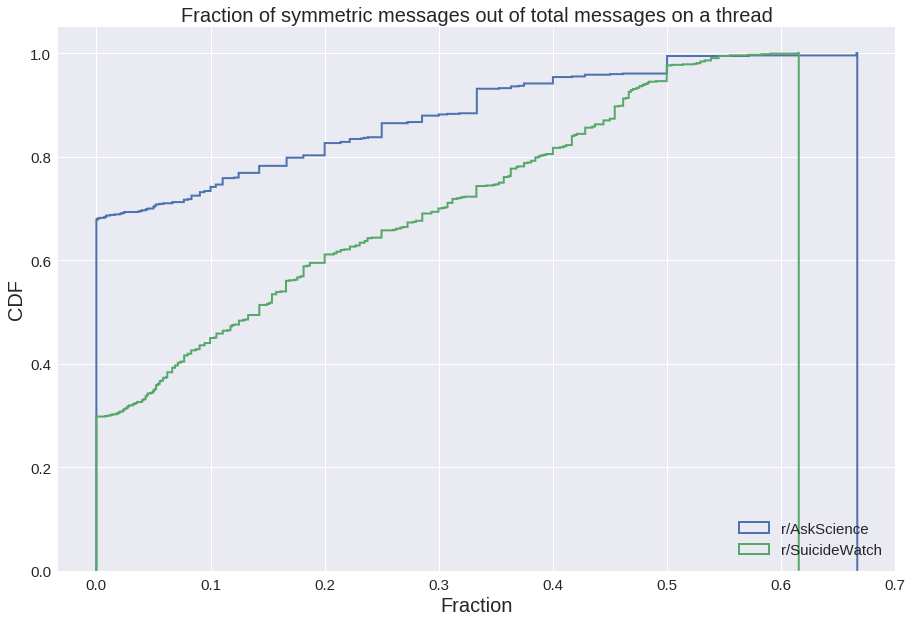

In [83]:

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Fraction of symmetric messages out of total messages on a thread", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/AskScience','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [84]:
print np.median(BL_messageParti) , np.mean(BL_messageParti)
print np.median(SW_messageParti) , np.mean(SW_messageParti)

0.0 0.0799152487397089
0.14285714285714285 0.18434098067548157


In [85]:
print len(BL_messageParti), len(SW_messageParti)

stats , pvalue = findMannWhitney(BL_messageParti , SW_messageParti)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_messageParti , BL_messageParti)
print stats/normstats, pvalue

886 923
239780.5 9.032444809832589e-52
Samples are same size, no need to resample
0.6109088453953906 9.032444809832589e-52


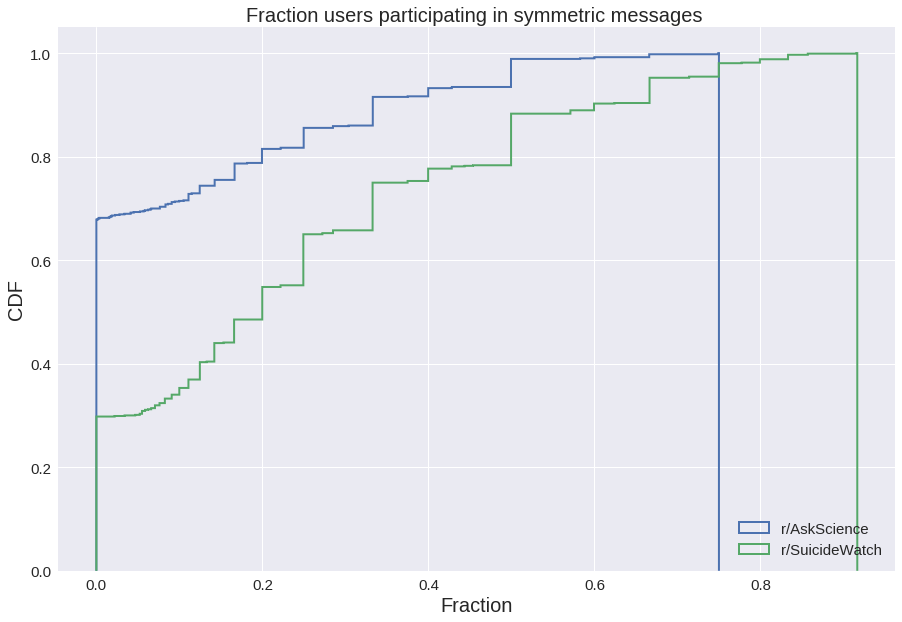

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Fraction users participating in symmetric messages ", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/AskScience','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [87]:
print np.median(BL_userParti) , np.mean(BL_userParti)
print np.median(SW_userParti) , np.mean(SW_userParti)

0.0 0.09007644113145519
0.2 0.23918258108988985


In [88]:
print len(BL_userParti), len(SW_userParti)

stats , pvalue = findMannWhitney(BL_userParti , SW_userParti)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_userParti , BL_userParti)
print stats/normstats, pvalue

886 923
228918.0 4.857137149728473e-59
Samples are same size, no need to resample
0.5832335451390835 4.857137149728473e-59


In [89]:
len(opAuthors_SW) , len(SW_bpusers)

(10157, 923)

In [90]:
def getDepthEmoDist(graphs , bpUsers , opUsers):
    rootEmoDict = {}
    BPUserEmoDict = {}
    for k in bpUsers:
        if k in opUsers:
            for i , d in graphs[k].nodes(data=True):
                if 'author' in d:
                    if d['author'] == opUsers[k]:
                        depth = d['depth']
                        if depth not in rootEmoDict:
                            rootEmoDict[depth] = []
                        rootEmoDict[depth].append(d['affects'])
                    elif d['author'] in bpUsers[k]:
                        depth = d['depth']
                        if depth not in BPUserEmoDict:
                            BPUserEmoDict[depth] = []
                        BPUserEmoDict[depth].append(d['affects'])
    return rootEmoDict , BPUserEmoDict

def getMeanError(emoDict, depthMax):
    MeanAffects =[]
    Error = []
    for k in range(-1,depthMax):
        if k in emoDict:
            MeanAffects.append(np.mean(emoDict[k]))
            Error.append(np.std(emoDict[k])/float(len(emoDict[k])))
        else:
            MeanAffects.append(MeanAffects[-1])
            Error.append(Error[-1])
    return MeanAffects , Error


# def get

In [91]:
SW_rootEmoDict , SW_bpUserEmoDict = getDepthEmoDist(sampledReply_SW,SW_bpusers,opAuthors_SW)
SW_rootMean , SW_rootError = getMeanError(SW_rootEmoDict,31)
SW_BPMean , SW_BPError = getMeanError(SW_bpUserEmoDict,31)
print len(SW_rootMean) , len(SW_rootError) , len(SW_BPError) , len(SW_BPMean)

32 32 32 32


In [92]:
BL_rootEmoDict , BL_bpUserEmoDict = getDepthEmoDist(filteredReply_BL,BL_bpusers,opAuthors_BL)
BL_rootMean , BL_rootError = getMeanError(BL_rootEmoDict,31)
BL_BPMean , BL_BPError = getMeanError(BL_bpUserEmoDict,31)
print len(BL_rootMean) , len(BL_rootError) , len(BL_BPMean) , len(BL_BPError)

32 32 32 32


In [93]:
# sns.distplot(rootEmoDict[7])

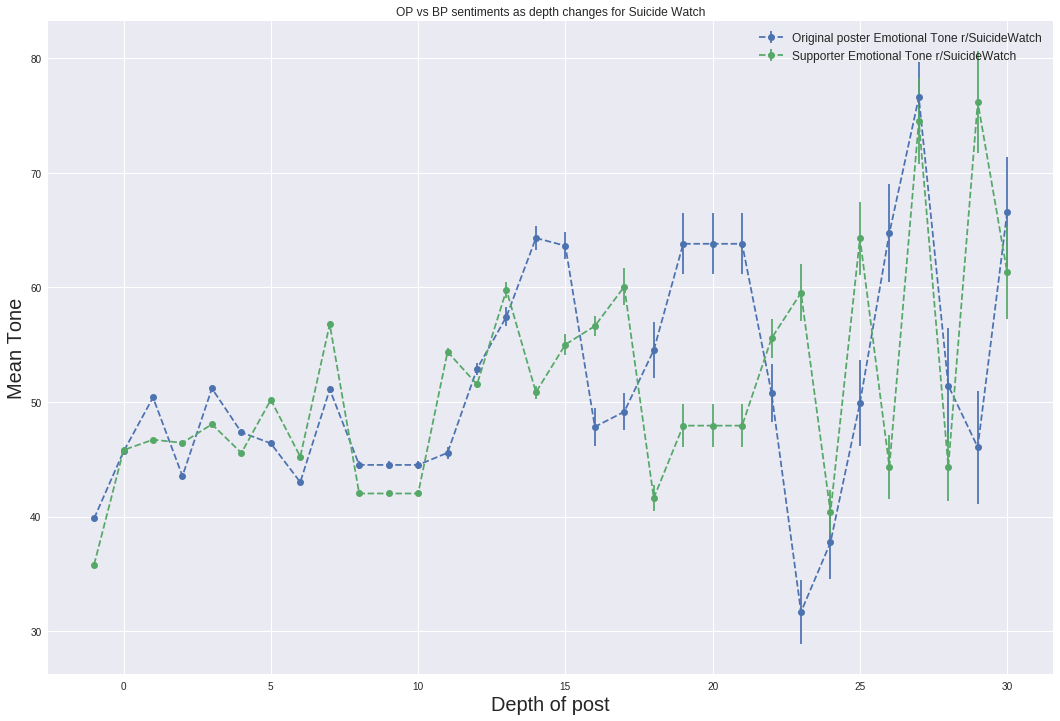

In [94]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(-1, 31, 1),SW_rootMean , yerr=SW_rootError, fmt='--o')
ax.errorbar(np.arange(-1, 31, 1),SW_BPMean , yerr=SW_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Suicide Watch")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Tone" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/SuicideWatch','Supporter Emotional Tone r/SuicideWatch'],fontsize=12)

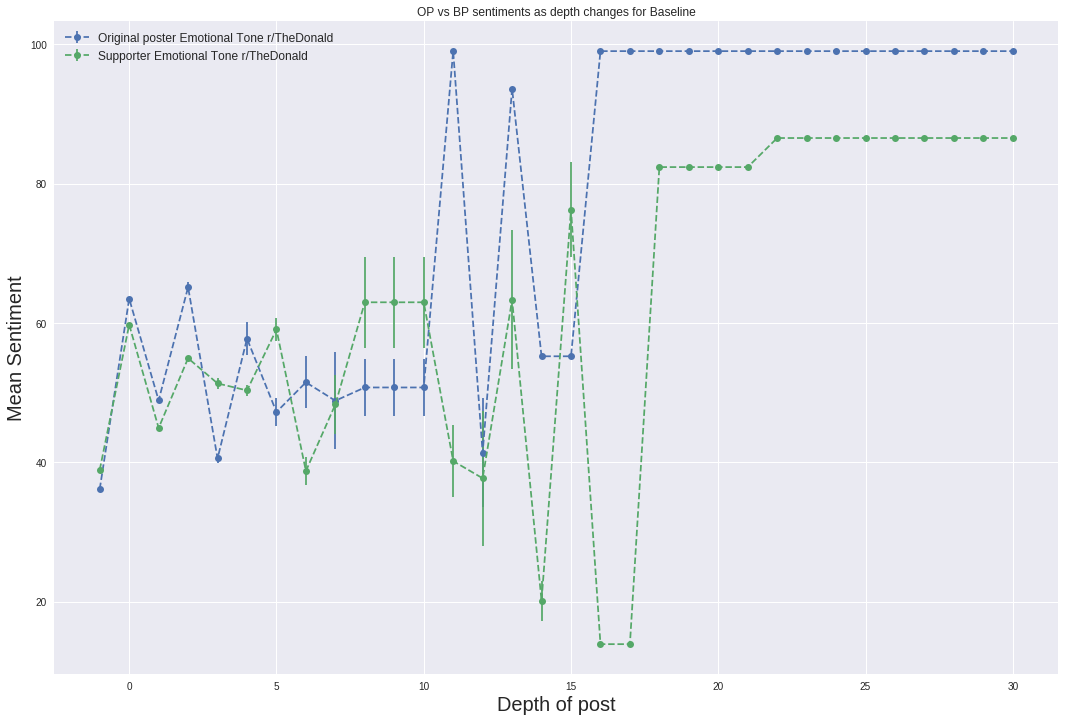

In [95]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(-1, 31, 1),BL_rootMean , yerr=BL_rootError, fmt='--o')
ax.errorbar(np.arange(-1, 31, 1),BL_BPMean , yerr=BL_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Baseline")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Sentiment" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/TheDonald' , 'Supporter Emotional Tone r/TheDonald'], fontsize=12)

In [96]:
triangleDist_SW = [sum(list(nx.triangles(sampledUgraphs_SW[k].to_undirected()).values()))/3 for k in sampledUgraphs_SW]
triangleDist_BL = [sum(list(nx.triangles(filteredUGraphs_BL[k].to_undirected()).values()))/3 for k in filteredUGraphs_BL]

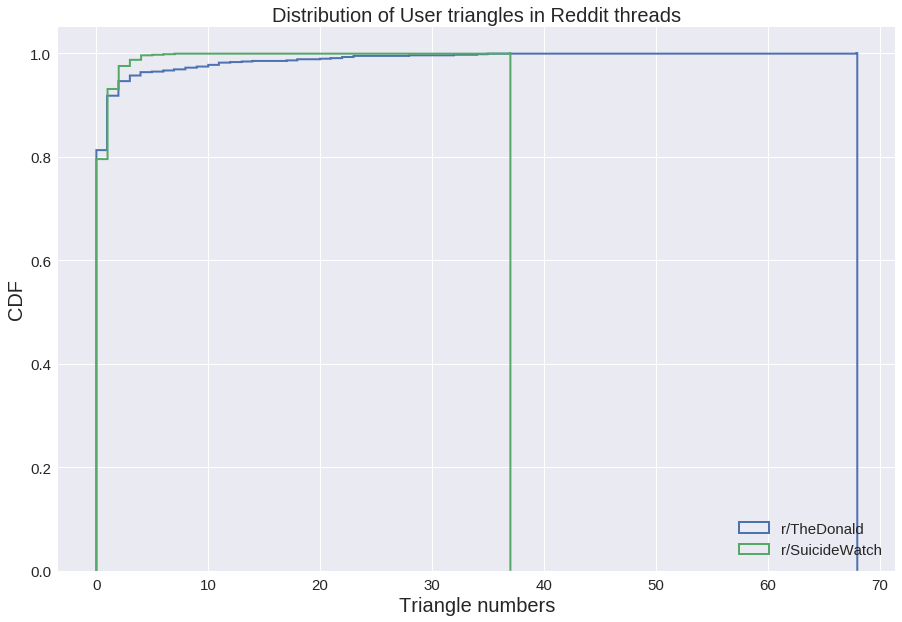

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(triangleDist_BL, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(triangleDist_SW, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Distribution of User triangles in Reddit threads", fontsize = 20)
plt.xlabel("Triangle numbers",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/TheDonald','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [98]:
print len(triangleDist_BL), len(triangleDist_SW)

stats , pvalue = findMannWhitney(triangleDist_BL , triangleDist_SW)
print stats , pvalue
normstats , normpvalue = findMannWhitney(triangleDist_BL , triangleDist_BL)
print stats/normstats, pvalue

923 923
Samples are same size, no need to resample
421265.0 0.27655361407517065
Samples are same size, no need to resample
0.9889673904750278 0.27655361407517065


In [99]:
isinstance(LIWC_SW.iloc[0]['B'],unicode)

False

In [100]:
# SW_Posts = []
# for index, row in LIWC_SW.iterrows():
#     SW_Posts.append(str(row['B']).decode("utf-8", "ignore"))
    


In [101]:
# len(SW_Posts)

In [103]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from gensim.models.ldamulticore import *
import gensim
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer

In [213]:
class Tokenizer:
    def __init__(self):
#         print "Created Tokenizer"
        self.regExTknizr = RegexpTokenizer(r'\w+')
        self.tweetTknizr = TweetTokenizer()
        self.treebankTknizer = TreebankWordTokenizer()
        
    def tokenizeByRegEx(self , text):
        return self.regExTknizr.tokenize(text)
    
    def tokenizeTweets(self,text):
        return self.tweetTknizr.tokenize(text)
    
    def simpleTokenizer(self, text):
        return text.strip().split()

    def gensimTokenizer(self , text):
        return gensim.utils.simple_tokenize(text)
    
    def wordTokenizer(self, text):
        return word_tokenize(text.strip())
    
    def treebankTokenize(self, text):
        return self.treebankTknizer.tokenize(text.strip())

    
    
# create English stop words list
en_stop = get_stop_words('en')
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

def check(u1 , ulist):
    if u1 in ulist:
        return True
    else:
        return False

def getOPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if g.node[node]['author'] == users[k]:
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getBPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in users:
                    continue
                if check(g.node[node]['author'],users[k]):
                    if g.node[node]['author'] in users[k]:
                        if g.node[node]['text'] == '[deleted]':
                            continue
                        texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getIRTexts(replyGraphs , op , bp):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in op or k not in bp:
                    continue
                checkList = [op[k]] + bp[k]
                if not check(g.node[node]['author'],checkList):
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getAllText(replyGraphs):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'text' not in g.node[node]:
                print g.node[node]
                continue
            if g.node[node]['text'] == '[deleted]':
                continue
            texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def tokenizeTexts(testList):
    # list for tokenized documents in loop
    toc_texts = []
    # loop through document list
    tokenizer = Tokenizer()
    for i in testList:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenizeByRegEx(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        toc_texts.append(stemmed_tokens)
    return toc_texts

def getTextTopics(text,model):
    raw = text.lower()
    tokenizer = Tokenizer()
    tokens = tokenizer.tokenizeByRegEx(raw)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
#     print stemmed_tokens
    topics = model.get_document_topics(dictionary.doc2bow(stemmed_tokens))
    return topics

In [105]:
len(opAuthors_SW), len(allGraphs_SW)

(10157, 10157)

In [106]:
SW_bpusers_all

{'vj5co': [u'zombiemeds'],
 '1uv2vj': [],
 'fjatc': [u'dead_by_saturday'],
 '1x6boy': [u'throwawayacct424'],
 '97akw': [u'[deleted]', u'PossiblePerson'],
 '3ci391': [u'peanutpeepz'],
 's79sc': [u'fuck_usernames123'],
 '2tjz9s': [u'BearDidIt'],
 'b0mvj': [u'itisover'],
 '2u23m8': [],
 'e9cx6': [],
 '19iji1': [u'IamANidiot21'],
 'mae5s': [],
 'ci9lz': [u'dontwannabehere'],
 '24gto5': [u'youcaughtthelight'],
 'dwd3s': [],
 '29en0c': [u'Ingvarkarlsson', u'throwawaybcirl'],
 '37zjrf': [u'pathfinder89'],
 '1cz1sd': [u'KimmyJongJong'],
 'ee901': [u'comb_over', u'southernbrew08'],
 '2nnud5': [],
 '2wo3jj': [u'throwitbitch1'],
 '1h1vqu': [u'nopointnow', u'rainbowtwinkies'],
 '16hiex': [u'griffin_desantos'],
 'e1hjc': [u'[deleted]'],
 'osxp1': [u'bleepitybleep', u'[deleted]', u'skekze'],
 '1dptdp': [u'muramana', u'endlesswatchdog'],
 '2lhvye': [],
 '2at60d': [u'Jessica-EdgeBlade'],
 '1p4pqm': [u'TMRobotic'],
 'ylt41': [],
 '2hip0u': [u'Missing_love'],
 'xwu8q': [u'1800HEYGTFO'],
 '1dqizr': [u'bu

In [107]:
# print len(SW_bpusers_all)
# with open("BpUserDict.pkl",'wb') as f:
#     pkl.dump(SW_bpusers_all,f)

In [108]:
Multiple_BP = {}
allUsers = []
for k in SW_bpusers_all:
    for u in SW_bpusers_all[k]:
        if u in allUsers:
            if u not in Multiple_BP:
                Multiple_BP[u] = 2
            else:
                Multiple_BP[u]+=1
        else:
            allUsers.append(u)
    
    

In [109]:
del Multiple_BP['[deleted]']

In [110]:
len(Multiple_BP)

979

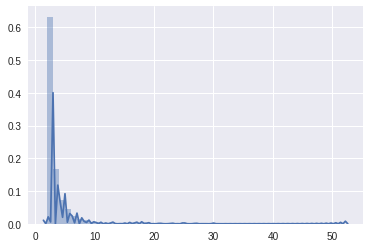

In [111]:
sns.distplot(Multiple_BP.values())

In [112]:
SW_multbpUsers = {}
for k in SW_bpusers_all:
    SW_multbpUsers[k] = []
    for m in SW_bpusers_all[k]:
        if m in Multiple_BP.keys():
            SW_multbpUsers[k].append(m)

In [113]:
# with open("multipleBP.pkl",'wb') as f:
#     pkl.dump(SW_multbpUsers,f)

In [114]:
len(SW_bpusers)

923

In [115]:
SW_IR_posts = getIRTexts(allGraphs_SW,opAuthors_SW,SW_bpusers)

In [116]:
SW_Texts = getAllText(allGraphs_SW)

{}


In [117]:
len(SW_IR_posts),len(SW_Texts)

(8374, 207176)

In [118]:
# SW_IR_posts[:10]

In [119]:
opAuthors_SW['pfn0u']

u'gabstergirl'

In [120]:
SW_OP_posts = getOPTexts(allGraphs_SW,opAuthors_SW)


In [121]:
len(SW_OP_posts)

44489

In [122]:
# SW_OP_posts[:10]

In [123]:
SW_BP_posts = getBPTexts(allGraphs_SW, SW_bpusers)

In [124]:
SW_MultBP_posts = getBPTexts(allGraphs_SW,SW_multbpUsers)

In [125]:
len(SW_MultBP_posts)

19688

In [126]:
len(SW_BP_posts)

5899

In [127]:
# SW_BP_posts[:10]

In [128]:
sampled_SW_IR_Posts = random.sample(SW_IR_posts,len(SW_BP_posts))

In [129]:
len(SW_OP_posts) , len(SW_BP_posts) , len(sampled_SW_IR_Posts)

(44489, 5899, 5899)

In [130]:
OP_tokenized = tokenizeTexts(SW_OP_posts)
BP_tokenized = tokenizeTexts(SW_BP_posts)
IR_tokenized = tokenizeTexts(SW_IR_posts)

Created Tokenizer
Created Tokenizer
Created Tokenizer


In [131]:
All_cleaned = tokenizeTexts(SW_Texts)

Created Tokenizer


In [132]:
MultBP_tokenized = tokenizeTexts(SW_MultBP_posts)

Created Tokenizer


In [133]:
len(All_cleaned)

207176

In [134]:
len(OP_tokenized) , len(BP_tokenized)

(44489, 5899)

In [135]:
OP_tokenized[1]

[u've',
 u'overcom',
 u'fear',
 u'death',
 u'now',
 u'can',
 u'go',
 u'live',
 u'life',
 u'differ',
 u'way',
 u'don',
 u't',
 u'give',
 u'soon',
 u'friend']

In [136]:
#turn our tokenized documents into a id <-> term dictionary
dictionary = gensim.corpora.Dictionary(All_cleaned)
# dictionary_BP =gensim.corpora.Dictionary(BP_tokenized)
# dictionary_IR =gensim.corpora.Dictionary(IR_tokenized)

In [137]:
# len(dictionary_BP), len(dictionary_IR)
len(dictionary)

65185

In [138]:
# len(dictionary_OP) , len(dictionary_BP)

In [139]:
# convert tokenized documents into a document-term matrix
# corpus_OP = [dictionary.doc2bow(text) for text in OP_cleaned_text]
# corpus_BP = [dictionary.doc2bow(text) for text in BP_tokenized]
# corpus_IR = [dictionary.doc2bow(text) for text in IR_tokenized]

In [140]:
All_corpus = [dictionary.doc2bow(text) for text in All_cleaned]

In [141]:
# MultBP_corpus = [dictionary.doc2bow(text) for text in MultBP_tokenized]

# BP_tokenized[3]

# len(corpus_BP) , len(corpus_IR)

# len(corpus_BP)

# type(corpus_OP)

In [142]:
sampled_corpus = random.sample(All_corpus,10000)

In [158]:
# ldamodel = LdaMulticore(sampled_corpus, id2word=dictionary, num_topics=200,workers=10) 
ldamodel = gensim.models.ldamodel.LdaModel(All_corpus, id2word=dictionary, num_topics=40) 

In [159]:
# generate LDA model
# ldamodel_OP = gensim.models.ldamodel.LdaModel(corpus_OP, num_topics=100, id2word = dictionary_OP, passes=20)
# ldamodel_OP = gensim.models.ldamodel.LdaModel(corpus_OP, id2word=dictionary, num_topics=50) 

# ldamodel_IR = gensim.models.ldamodel.LdaModel(corpus_IR, id2word=dictionary, num_topics=20) 



# ldamodel_BP = gensim.models.ldamodel.LdaModel(corpus_BP, num_topics=100, id2word = dictionary_BP, passes=20)
# ldamodel_BP = gensim.models.ldamodel.LdaModel(corpus_BP, id2word=dictionary, num_topics=10) 

# ldamodel[All_corpus[11]]

# ldamodel_MultBP = gensim.models.ldamodel.LdaModel(MultBP_corpus, id2word=dictionary, num_topics=10) 

In [160]:
pyLDAvis.enable_notebook()
topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel,corpus=sampled_corpus,dictionary=dictionary)
# pyLDAvis.display(topic_display)

In [161]:
pyLDAvis.display(topic_display)

In [169]:
# ldamodel.save("SW_allcorpus_model")

In [162]:


# turn on automatic rendering of visualizations
# pyLDAvis.enable_notebook()
# bp_topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel_BP,corpus=corpus_BP,dictionary=dictionary)
# pyLDAvis.display(bp_topic_display)

In [163]:
# turn on automatic rendering of visualizations
# pyLDAvis.enable_notebook()

# ir_topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel_IR,corpus=corpus_IR,dictionary=dictionary)
# pyLDAvis.display(ir_topic_display)

In [164]:
# ldamodel_BP.print_topics(10)

# ldamodel_OP.print_topics(10)



In [165]:
# ldamodel_IR.print_topics(10)

In [166]:
dictionary.values().index('harm')

43068

In [167]:
# ldamodel.save("SW_Alltext.mdl")

In [253]:
topics1 = getTextTopics("hello there this is the captain speaking, we are about to crash land. Brace for impact",ldamodel)
topics2 = getTextTopics("The captian of the plane goes down with the plane when it crashes",ldamodel)
topics3 = getTextTopics("Hello everyone, we are not going to crash land. This is the captain", ldamodel)

In [254]:
print topics1, topics2 , topics3

[(0, 0.12801415), (23, 0.128125), (25, 0.2532347), (27, 0.12812614), (36, 0.253125)] [(5, 0.4640349), (25, 0.3459651)] [(23, 0.2986164), (25, 0.4226953), (36, 0.14654544)]


In [255]:
def findJaccardTopicsMetric(topicarray1, topicarray2):
    topicidx1 = [k[0] for k in topicarray1]
    topicidx2 = [k[0] for k in topicarray2]
    intersection = len(list(set(topicidx1).intersection(topicidx2)))
    union = (len(topicidx1) + len(topicidx2)) - intersection
    return float(intersection) / float(union)

In [256]:
print findJaccardTopicsMetric(topics1 , topics2) , findJaccardTopicsMetric(topics2,topics3) , findJaccardTopicsMetric(topics1,topics3)

0.166666666667 0.25 0.6


In [375]:
def createTopicGraphs(replyGraphs,ldaModel, deletedUsers=None):
    topicGraphs = {}
    for i in replyGraphs:
        deleted = nx.get_node_attributes(replyGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(replyGraphs[i],'author')
        texts = nx.get_node_attributes(replyGraphs[i],'text')
        for e in replyGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            
            if e[0] in texts and e[1] in texts:
                topicSrc = getTextTopics(texts[e[0]].decode("utf-8", "ignore"),ldaModel)
                topicDest = getTextTopics(texts[e[1]].decode("utf-8", "ignore"),ldaModel)
                jaccard = findJaccardTopicsMetric(topicSrc , topicDest)
            else:
                jaccard = 0.0
                
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=jaccard )
            else:
                origWeight = userGraph[src][dst]['weight']
                update = (origWeight + jaccard)
                userGraph[src][dst]['weight'] = update
        topicGraphs[i] = userGraph
    return topicGraphs
    

In [ ]:
topicUserGraphs = createTopicGraphs(allGraphs_SW,ldamodel)

In [ ]:
#Save Topic Graphs: 
# with open("../Data/SW_TopicUgraphs.pkl",'wb') as f:
#     pkl.dump(file=f , obj=topicUserGraphs)

In [378]:
sizes = {}
for k in topicUserGraphs:
    sizes[k] = len(topicUserGraphs[k].nodes())

In [379]:
import operator
max(sizes.iteritems(), key=operator.itemgetter(1))[0]

'dltcq'

107


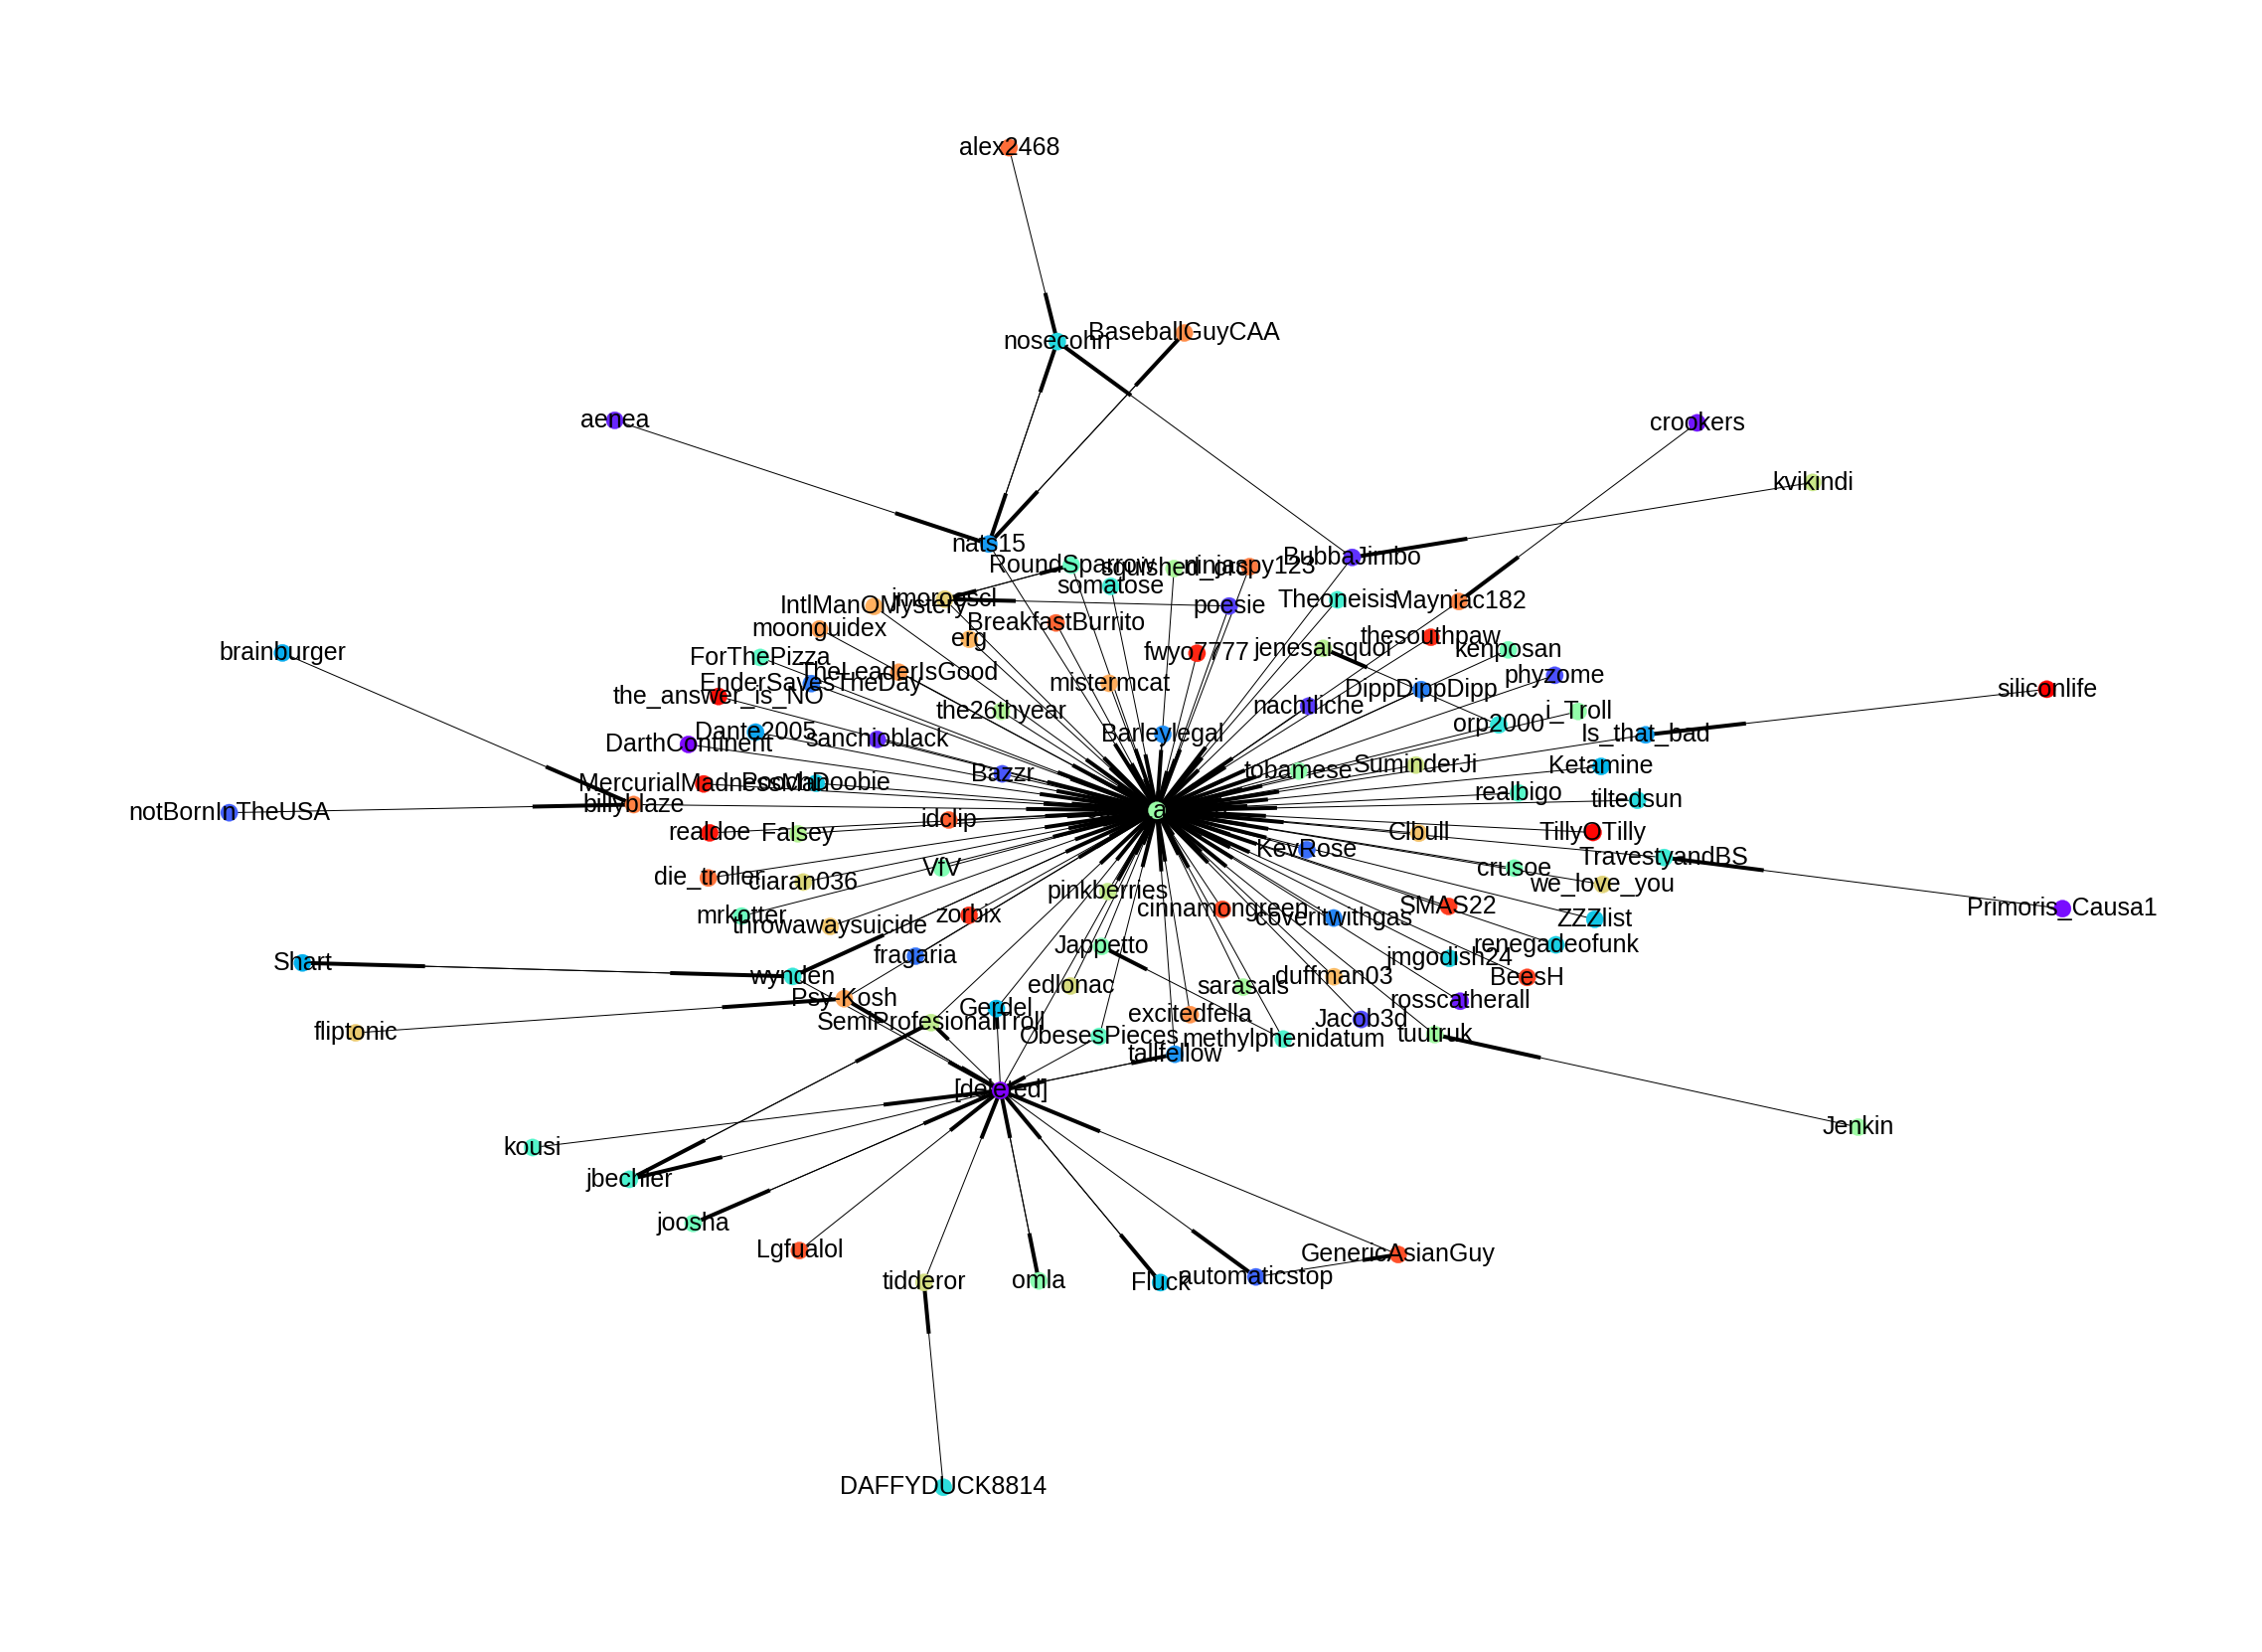

In [380]:
drawUserGraph(topicUserGraphs['dltcq'])

In [277]:
def createGiantTopicGraph(allGraphs,ldaModel,deletedUsers=None):
    userGraph = nx.DiGraph()
    for i in allGraphs:
        deleted = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
#         userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        texts = nx.get_node_attributes(allGraphs[i],'text')
        for e in allGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            if e[0] in texts and e[1] in texts:
                topicSrc = getTextTopics(texts[e[0]].decode("utf-8", "ignore"),ldaModel)
                topicDest = getTextTopics(texts[e[1]].decode("utf-8", "ignore"),ldaModel)
                jaccard = findJaccardTopicsMetric(topicSrc , topicDest)
            else:
                jaccard = 0.0
            
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=jaccard )
            else:
                origWeight = userGraph[src][dst]['weight']
                update = (origWeight + jaccard)
                userGraph[src][dst]['weight'] = update
    return userGraph

In [ ]:
giantTopicGraph = createGiantTopicGraph(allGraphs_SW,ldamodel)

In [372]:
def findWeightimbalance(graphs, userDict):
    userBalance = []
    reflectiveBalance = []
    for k in userDict:
        if len(userDict[k]) > 0:
            for u in userDict[k]:
                inEdges = graphs[k].in_edges(u,data=True)
                outEdges = graphs[k].out_edges(u,data=True)
                if len(inEdges) > 0 and len(outEdges) > 0:
                    inWeight = float(sum([e[2]['weight'] for e in inEdges]))/float(len(inEdges))
                    outWeight =float(sum([e[2]['weight'] for e in outEdges]))/float(len(outEdges))
                    if inWeight == 0.0:
                            continue
                    userBalance.append(outWeight/inWeight)
            for u in graphs[k].nodes():
                if u not in userDict[k]:
                    inEdges = graphs[k].in_edges(u,data=True)
                    outEdges = graphs[k].out_edges(u,data=True)
                    if len(inEdges) > 0 and len(outEdges) > 0:
                        inWeight = float(sum([e[2]['weight'] for e in inEdges]))/float(len(inEdges))
                        if inWeight == 0.0:
                            continue
                        outWeight =float(sum([e[2]['weight'] for e in outEdges]))/float(len(outEdges))
                        reflectiveBalance.append(outWeight/inWeight)
    return userBalance, random.sample(reflectiveBalance,len(userBalance))

            

In [373]:
BP_balance, genericUserBalance = findWeightimbalance(topicUserGraphs,SW_bpusers_all)

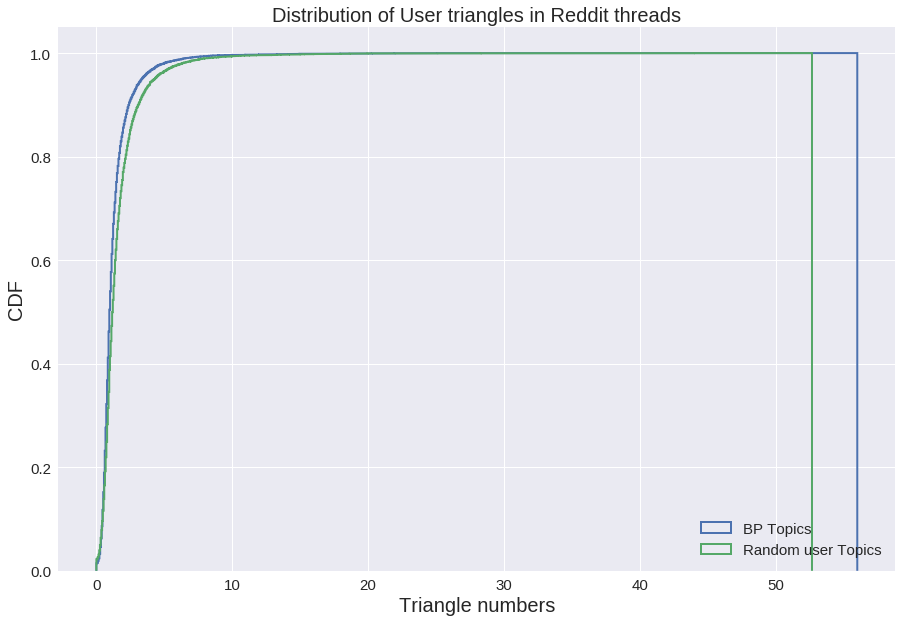

In [374]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BP_balance, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(genericUserBalance, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Distribution of User triangles in Reddit threads", fontsize = 20)
plt.xlabel("Triangle numbers",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['BP Topics','Random user Topics'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [287]:
degrees = nx.degree_histogram(giantTopicGraph)

In [353]:
# print degrees

In [352]:
clusteringSW = {}
for k in topicUserGraphs:
    SW_clustering = nx.clustering(topicUserGraphs[k].to_undirected())
    clusteringSW[k] = SW_clustering

In [354]:
BP_clustering = []

for k in clusteringSW:
    if len(SW_bpusers_all[k]) > 0:
        for u in SW_bpusers_all[k]:
            BP_clustering.append(clusteringSW[k][u])

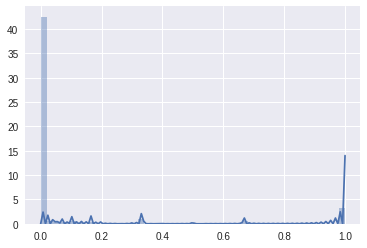

In [355]:
sns.distplot(BP_clustering)

In [ ]:
#Save Giant Topic Graph: 
# with open("../Data/SW_GiantTopicGraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=giantTopicGraph)

In [285]:
# nx.write_gpickle(giantTopicGraph,"../../node2vec/graph/SW_GiantTopicGraph.gpkl")
# nx.write_gexf(giantTopicGraph,"../Data/topicGraph.gexf")

In [282]:
len(giantTopicGraph.nodes())

31049